In [6]:
import numpy as np
import random
import pandas as pd
from format_data import *
from preprocess import *
from plots import *
from utils import *

In [7]:
np.random.seed(100)
random.seed(100)

In [8]:
Db=create_dataframe()

# Supervised: output yield_strength

## 1. Preprocessing

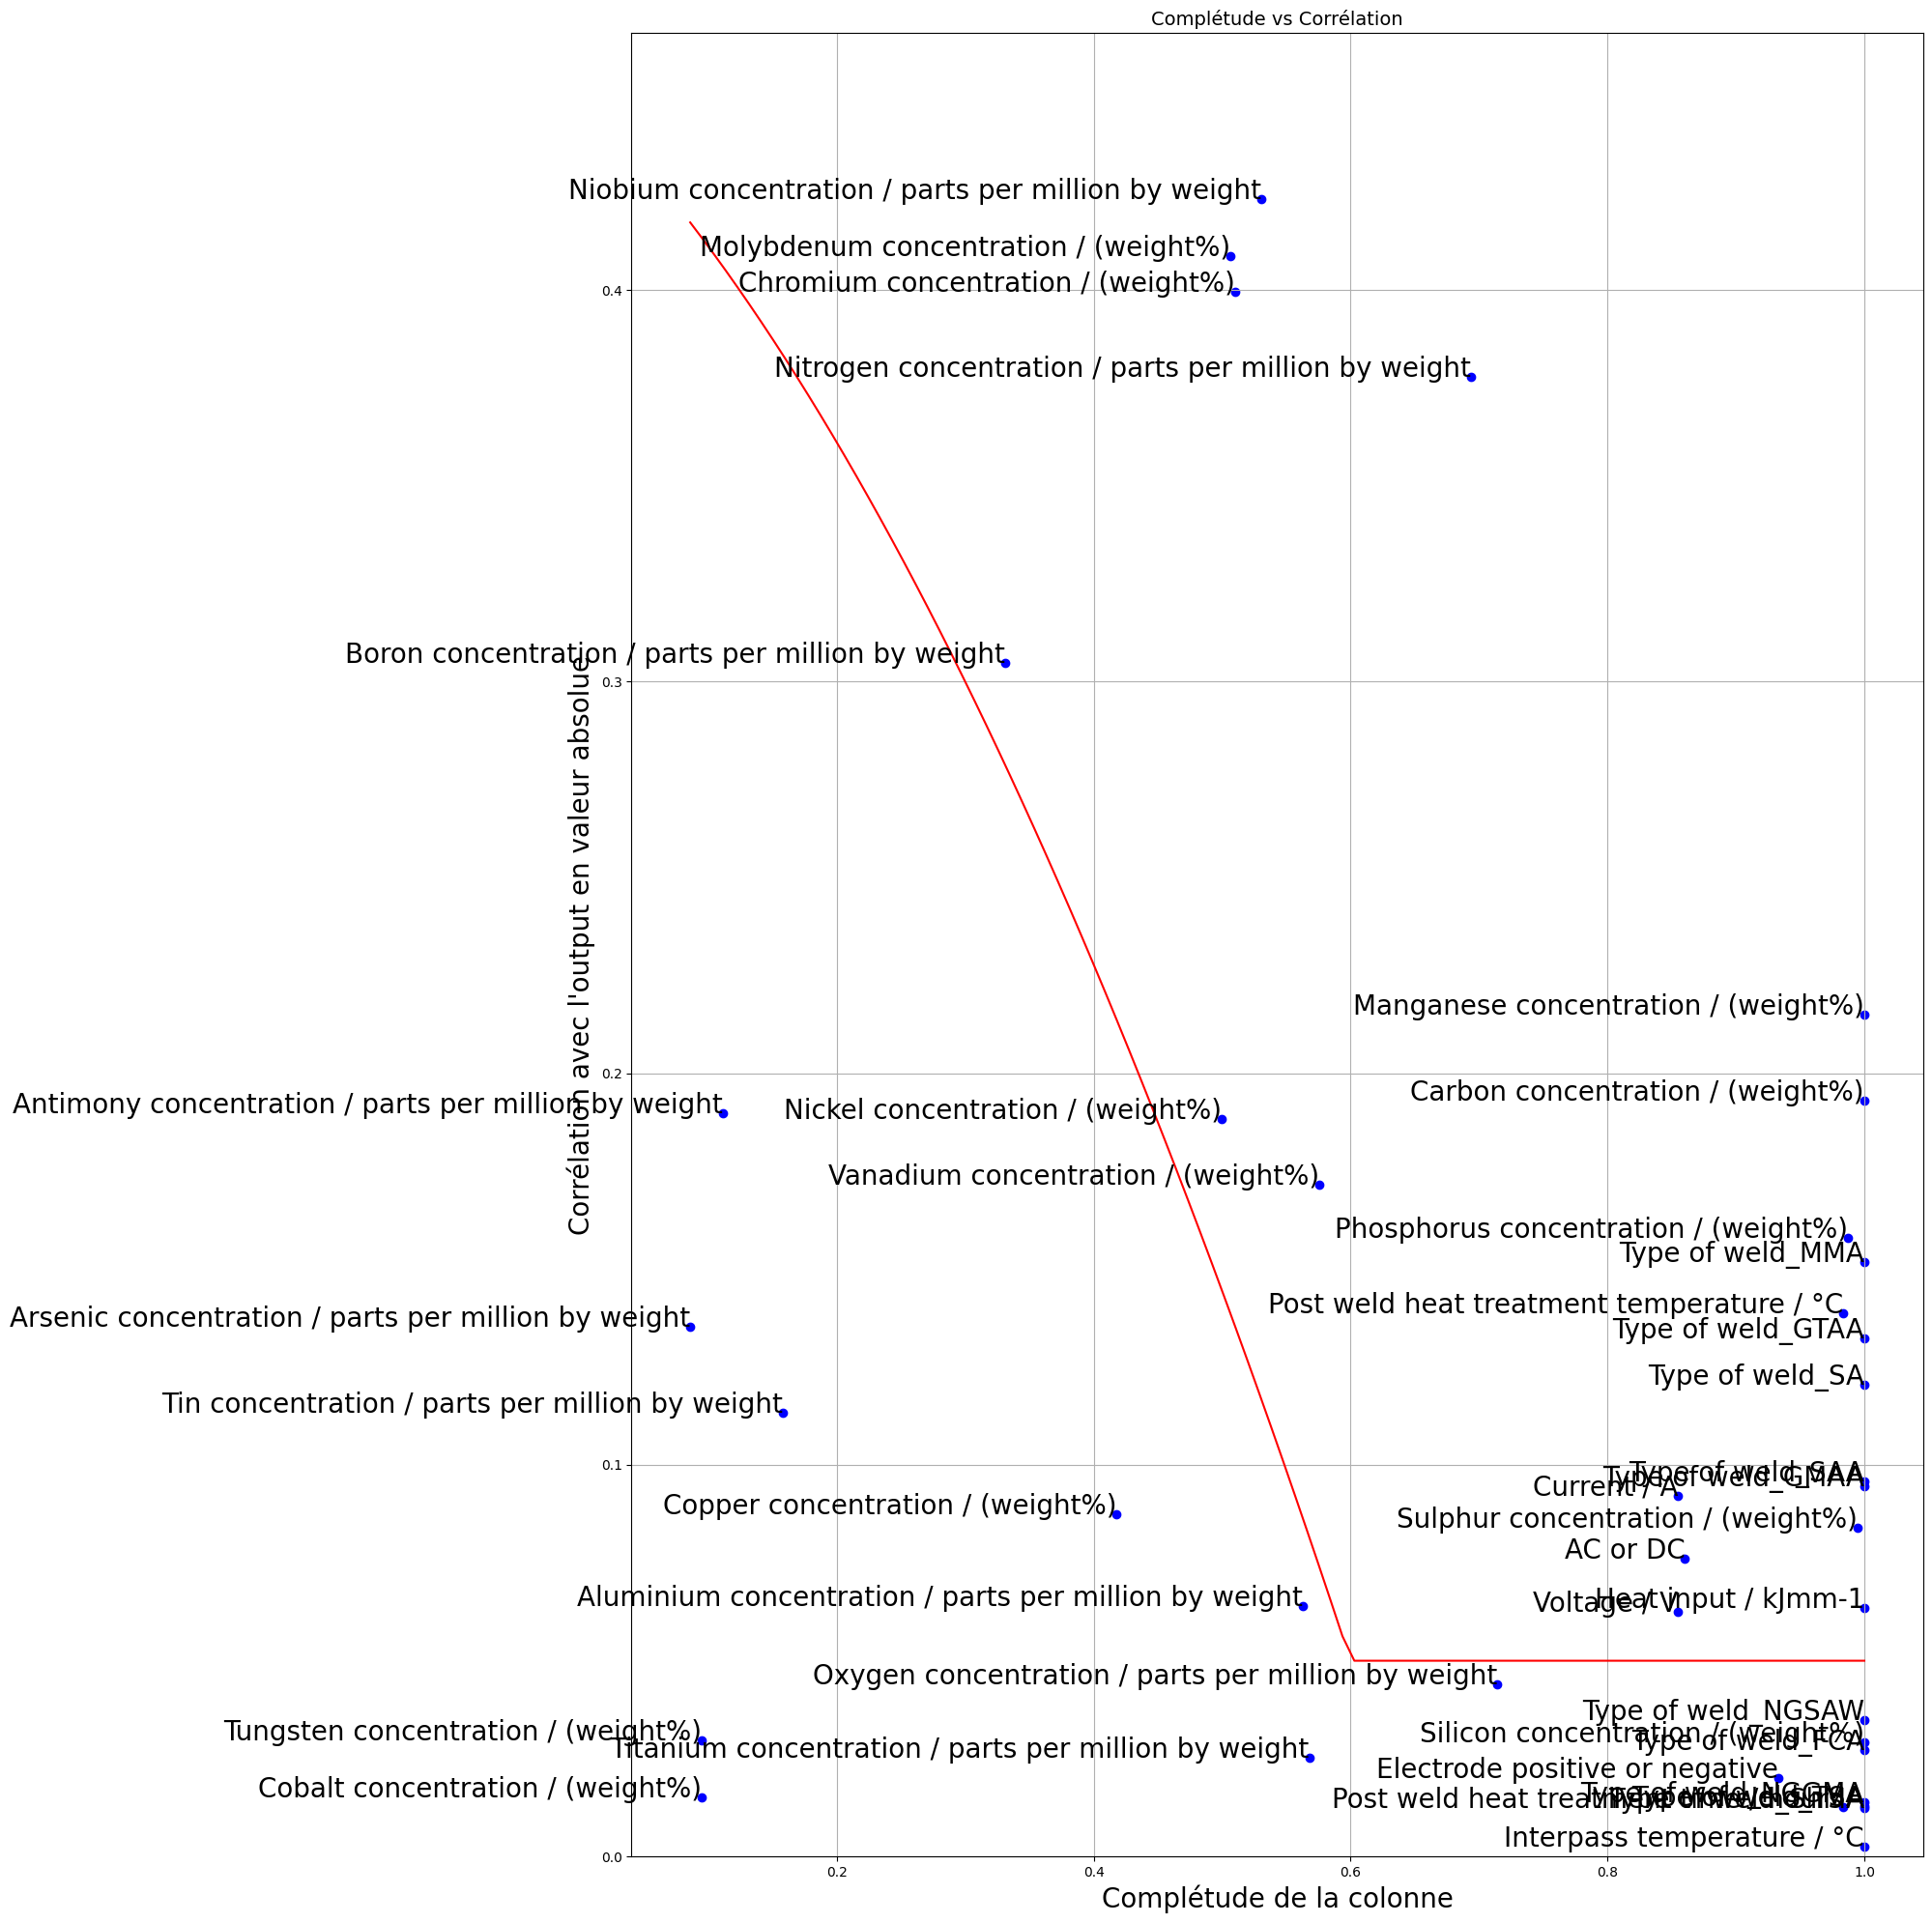

In [24]:
plot_completeness_vs_corr(Db, OutputColumn.yield_strength, feature_decision=feature_decision)

In [10]:
target = OutputColumn.yield_strength

preprocessed_Db = preprocess_supervised(Db, target)
X, y = split_target_from_dataset(preprocessed_Db)

We retain only the rows with output values Yield strength / MPa, that is 47.215496% of the dataset


## 2. Regressions

Evaluate Linear Regression
Performing Evaluation with Cross-Validation


  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [04:59<00:00, 15.74s/it]


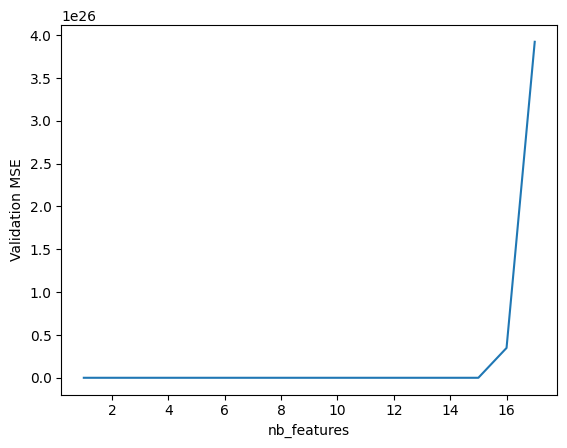

Best features:  ['Molybdenum concentration / (weight%)', 'Manganese concentration / (weight%)', 'Type of weld_SA', 'Nickel concentration / (weight%)', 'Type of weld_GTAA', 'AC or DC']


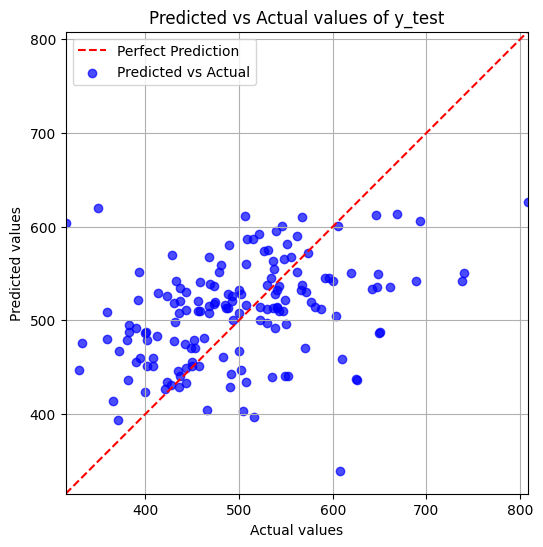

{'MSE': 6691.227544066236, 'R²': 0.22892420987166054, 'Bias': -1.6465724887736397, 'Variance': 3113.1033041766786}
Search best degree


100%|██████████| 19/19 [25:30<00:00, 80.56s/it] 


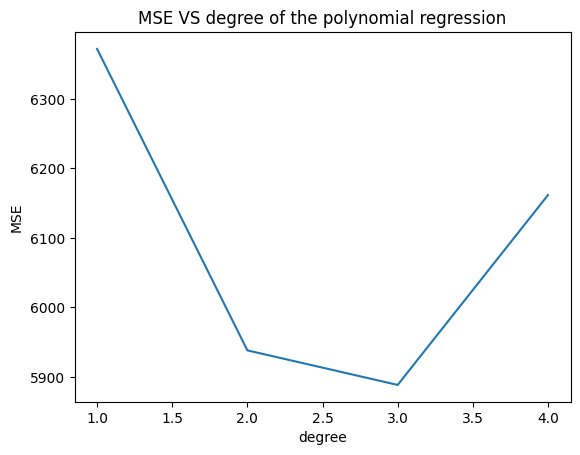

Evaluate Polynomial Regression with degree  3
Performing Evaluation with Cross-Validation


100%|██████████| 19/19 [09:56<00:00, 31.37s/it]


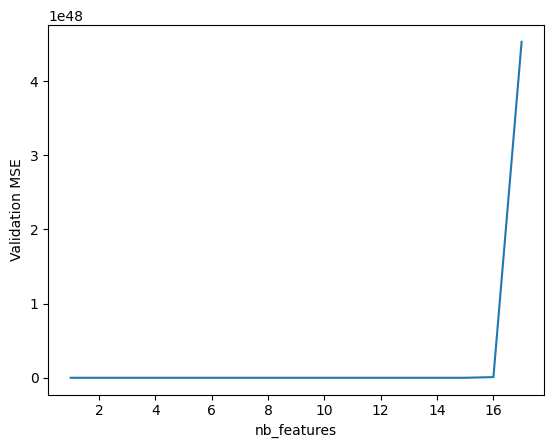

Best features:  ['Molybdenum concentration / (weight%)', 'Type of weld_GTAA', 'Type of weld_SA', 'Type of weld_GMAA', 'Manganese concentration / (weight%)', 'Type of weld_SAA', 'AC or DC']


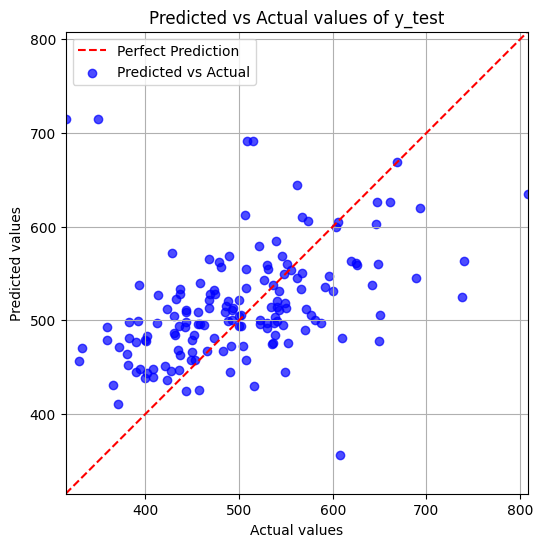

{'MSE': 6220.85700139537, 'R²': 0.2854423755687483, 'Bias': 0.42202853106000654, 'Variance': 3123.5347349290387}


In [6]:
from models.regressions import evaluate_linear_regression, evaluate_polynomial_regression

evaluate_linear_regression(X,y)
evaluate_polynomial_regression(X,y)

## 3. Random Forest

Selecting best Random Forest hyper-parameters
Choose parameters: {'n_estimators': np.int64(150), 'max_depth': np.int64(30), 'max_features': 7}


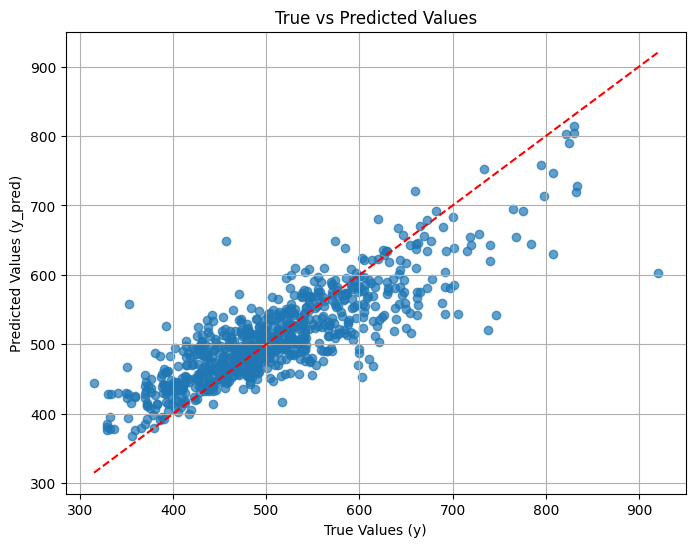

Evaluation results:
{'MSE (OOB)': np.float64(2587.353827172935), 'R² (OOB)': 0.6995967201035374, 'Bias (OOB)': np.float64(0.3394769966217052), 'Variance (OOB)': np.float64(4433.477463429322)}
Model saved as: models/pickels/random_forest.pkl


In [4]:
from models.randomforests import complete_pipeline

rf_model = complete_pipeline(X, y)

## 4. Gradient Boosting

Selecting best xgboost_supervised model
Best parameters for xgboost_supervised: {'model__alpha': 0.1, 'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 700}


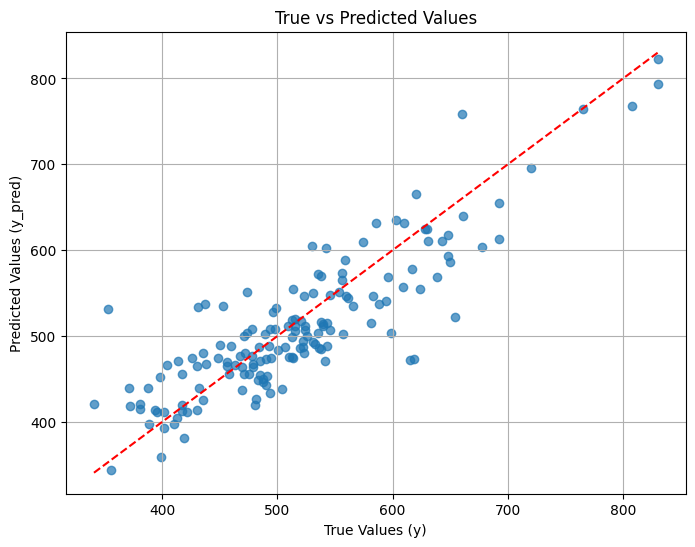

Evaluation results:
{'MSE': np.float64(2126.7708372834286), 'R²': 0.7447362478510844, 'Bias': np.float64(-6.299738409580328), 'Variance': np.float32(6646.6436)}


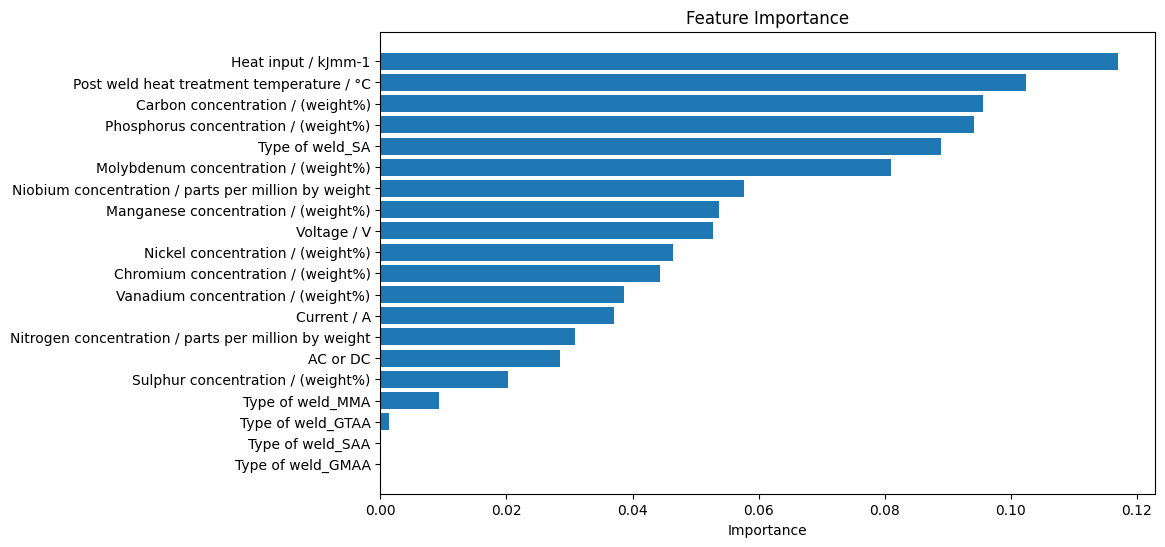

Model saved as: models/pickels/xgboost_supervised.pkl


In [6]:
from models.boosting_techniques import complete_pipeline, XGBoostConfigSupervised
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
complete_pipeline(X_train, X_test, y_train, y_test, XGBoostConfigSupervised())

# PCA

In [11]:
from dataset_analysis.PCA import *
pca_datset=preprocess_PCA(Db)
pca_datset.describe()

Nitrogen concentration / parts per million by weight  \
count                                        1652.000000      
mean                                           -0.004802      
std                                             0.981404      
min                                            -2.458876      
25%                                            -0.464620      
50%                                            -0.296036      
75%                                             0.100366      
max                                             4.575533      

       Manganese concentration / (weight%)  Voltage / V  \
count                          1652.000000  1652.000000   
mean                              0.002867    -0.015870   
std                               1.001061     0.978610   
min                              -2.477133    -1.893792   
25%                              -0.691304    -0.526436   
50%                               0.184890    -0.507309   
75%                               0.653085     0.190630   
max                               2.632880     3.804639   

       Silicon concentration / (weight%)  Interpass temperature / °C  \
count                       1.652000e+03                 1652.000000   
mean                       -4.301106e-16                   -0.002488   
std                         1.000303e+00                    1.001692   
min                        -2.566934e+00                   -4.676541   
25%                        -5.210542e-01                   -0.123999   
50%                        -7.629780e-02                   -0.123999   
75%                         2.795073e-01                   -0.123999   
max                         7.217707e+00                    2.405191   

       Phosphorus concentration / (weight%)  Current / A  \
count                           1652.000000  1652.000000   
mean                               0.005738    -0.025912   
std                                1.002304     0.957349   
min                               -0.898714    -2.113643   
25%                               -0.303376    -0.591419   
50%                               -0.150477    -0.591419   
75%                                0.053387     0.083932   
max                               12.081401     3.200939   

       Vanadium concentration / (weight%)  Carbon concentration / (weight%)  \
count                         1652.000000                       1652.000000   
mean                            -0.071125                          0.018544   
std                              0.993981                          1.005304   
min                             -3.339205                         -2.203125   
25%                             -0.298456                         -0.643910   
50%                             -0.258190                          0.060252   
75%                              0.261222                          0.412333   
max                             15.202146                          2.605406   

       Post weld heat treatment temperature / °C  \
count                                1652.000000   
mean                                   -0.004091   
std                                     1.002644   
min                                    -3.005333   
25%                                    -1.067493   
50%                                    -0.191563   
75%                                     0.964665   
max                                     1.685563   

       Oxygen concentration / parts per million by weight  \
count                                        1652.000000    
mean                                            0.011053    
std                                             1.009101    
min                                            -3.047739    
25%                                            -0.501728    
50%                                            -0.101525    
75%                                             0.304432    
max                                             

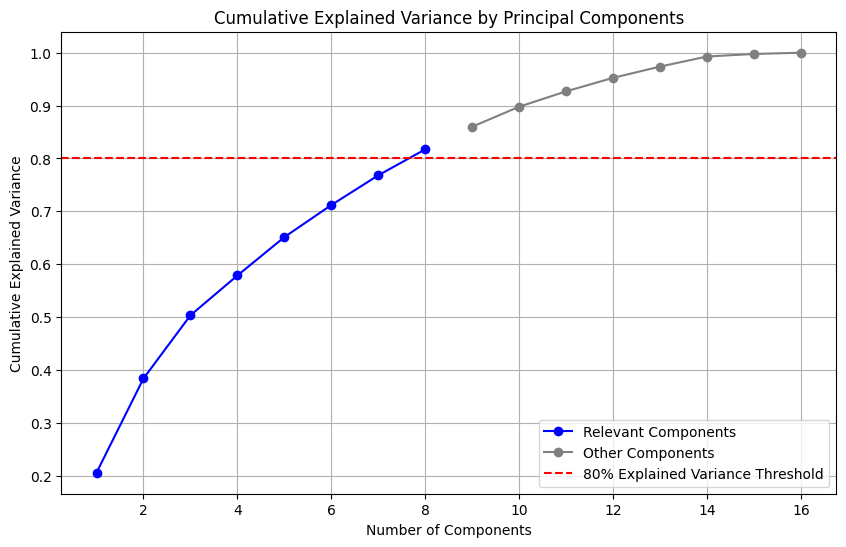

In [13]:
pca, principal_components, nb_relevant_features = run_PCA(pca_datset)
plot_explained_variance_pca(pca, nb_relevant_features)

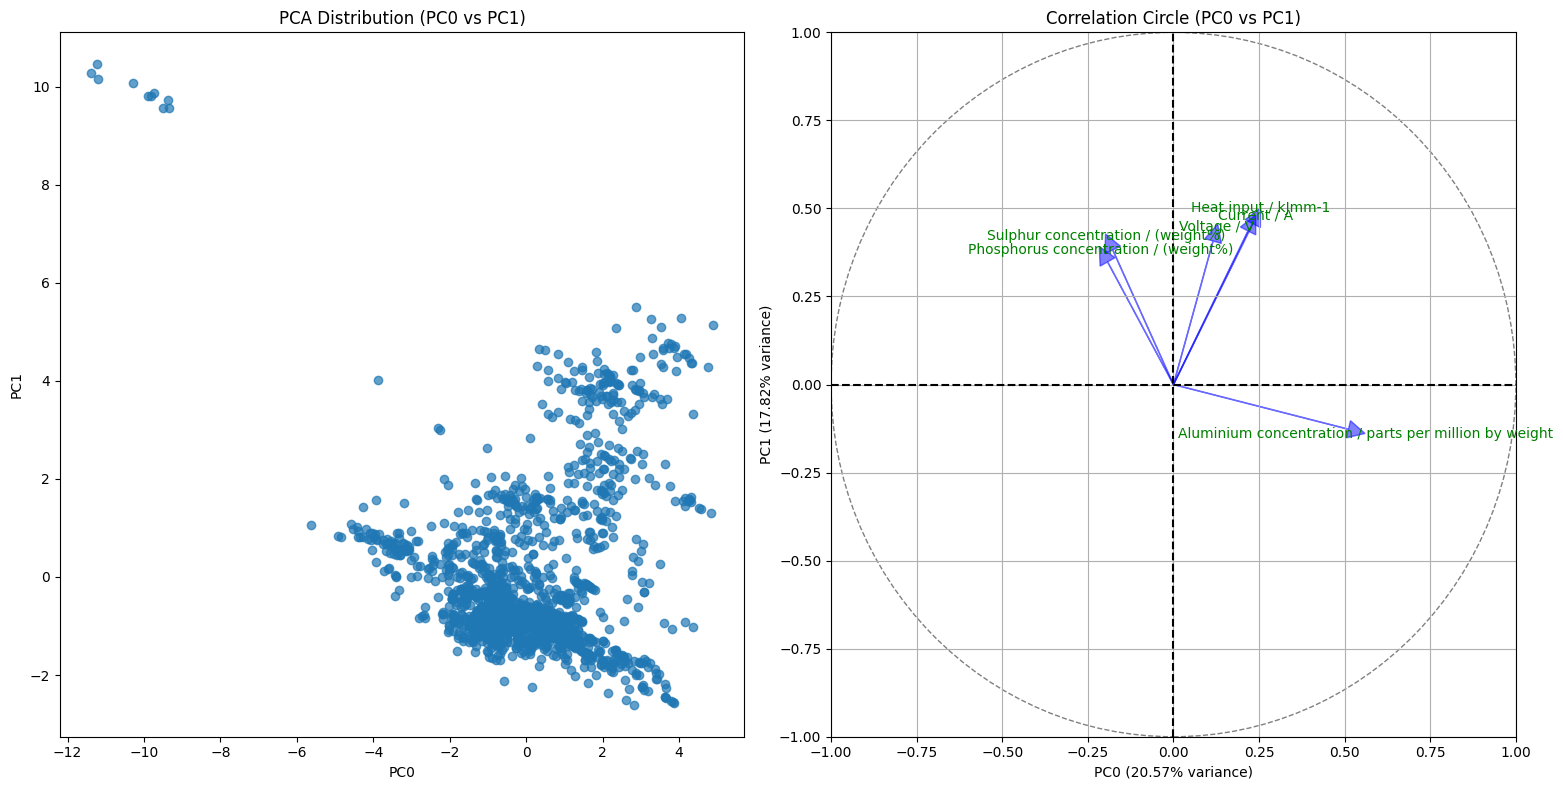

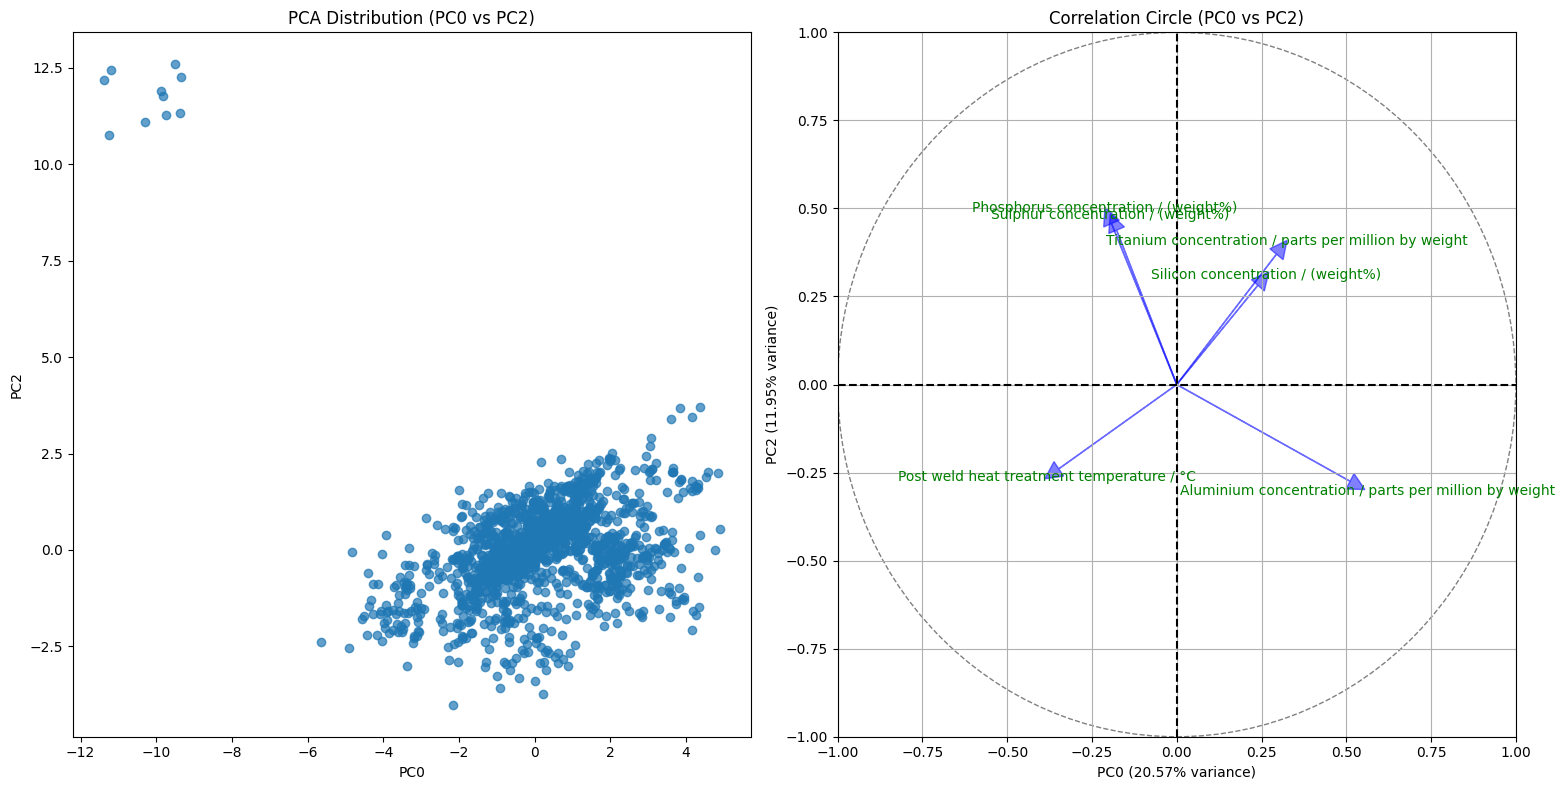

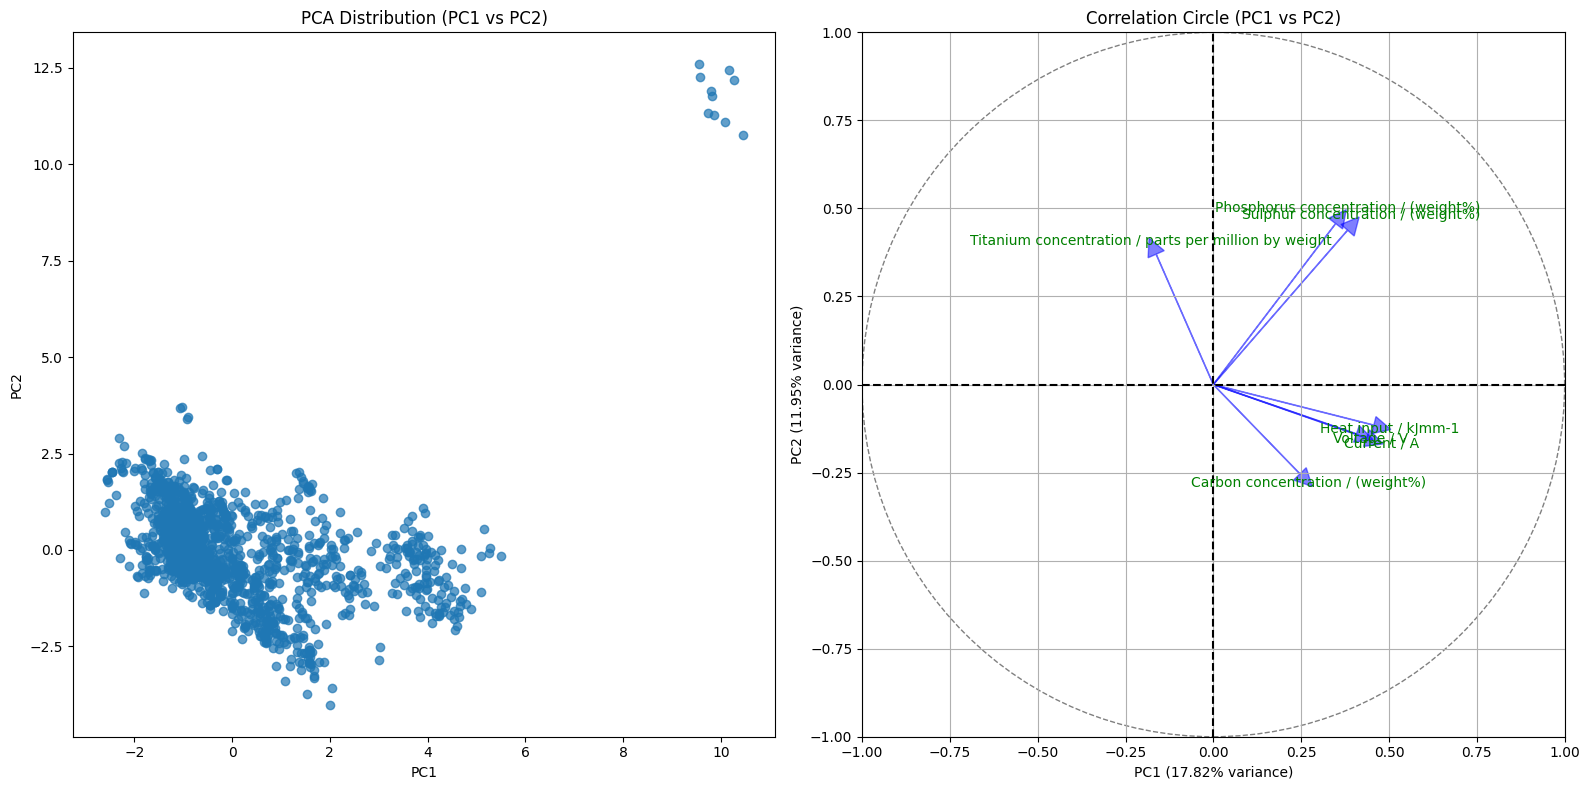

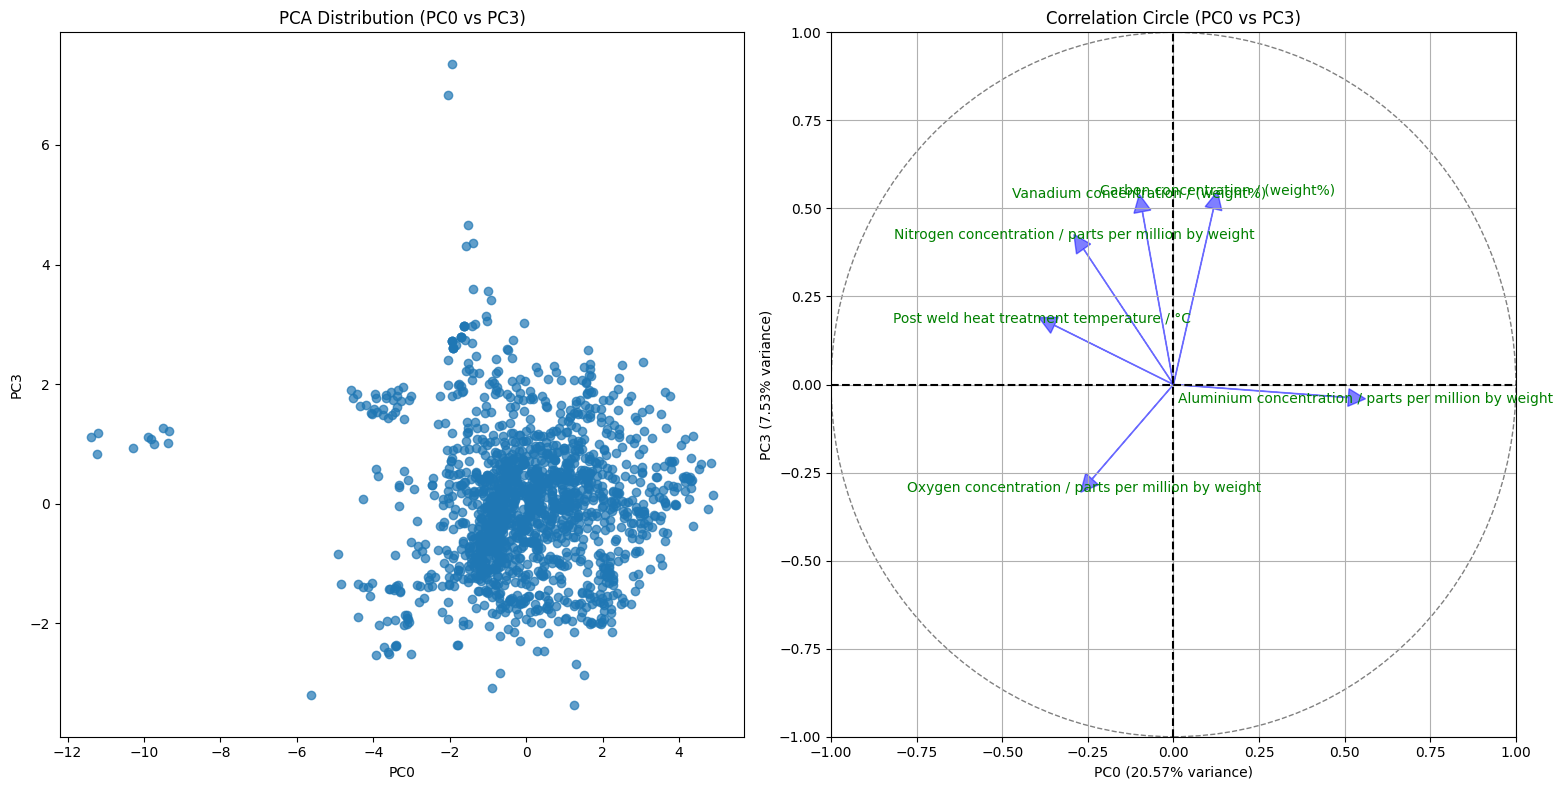

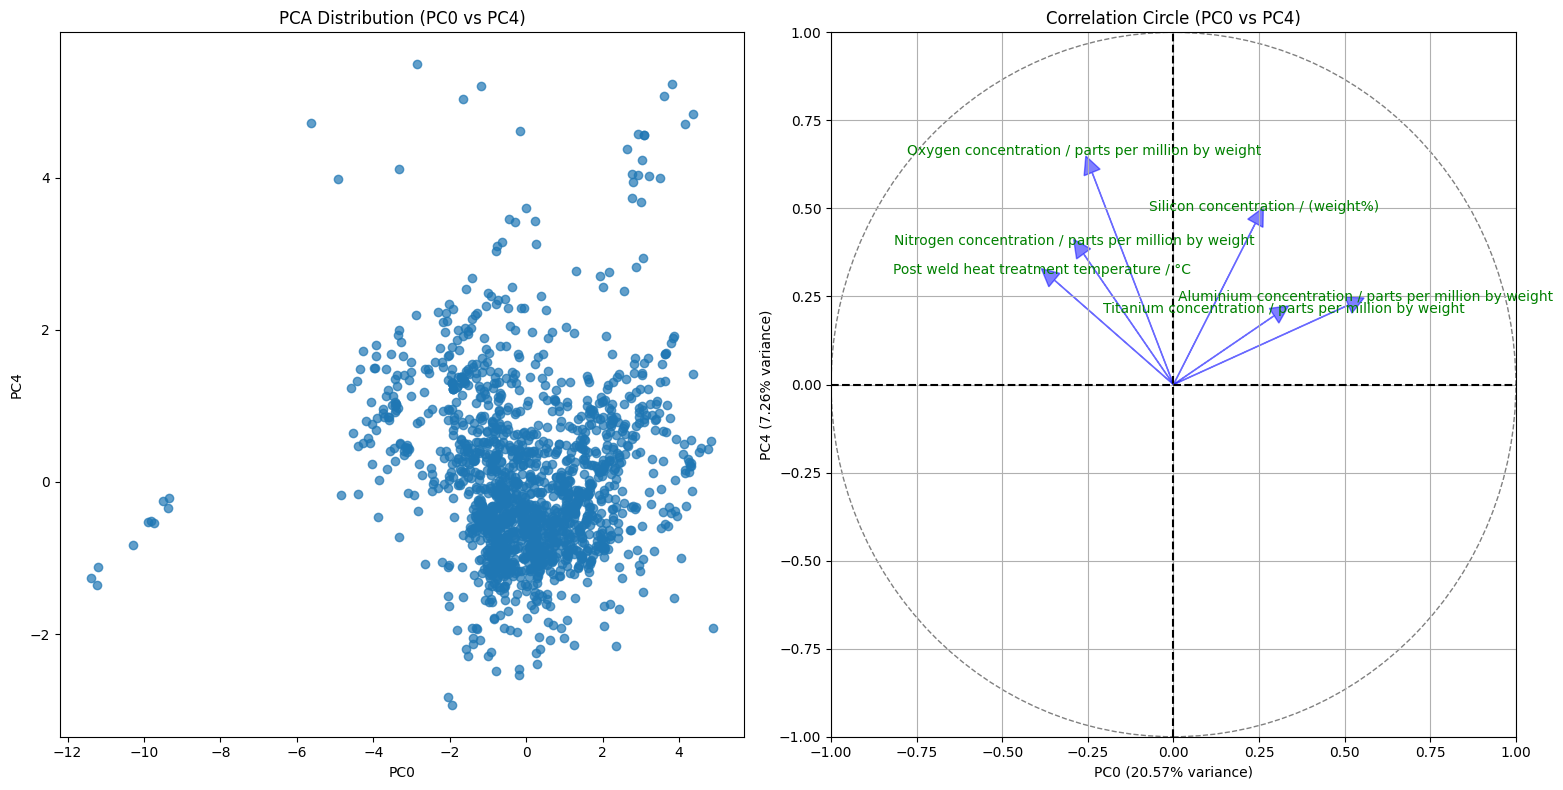

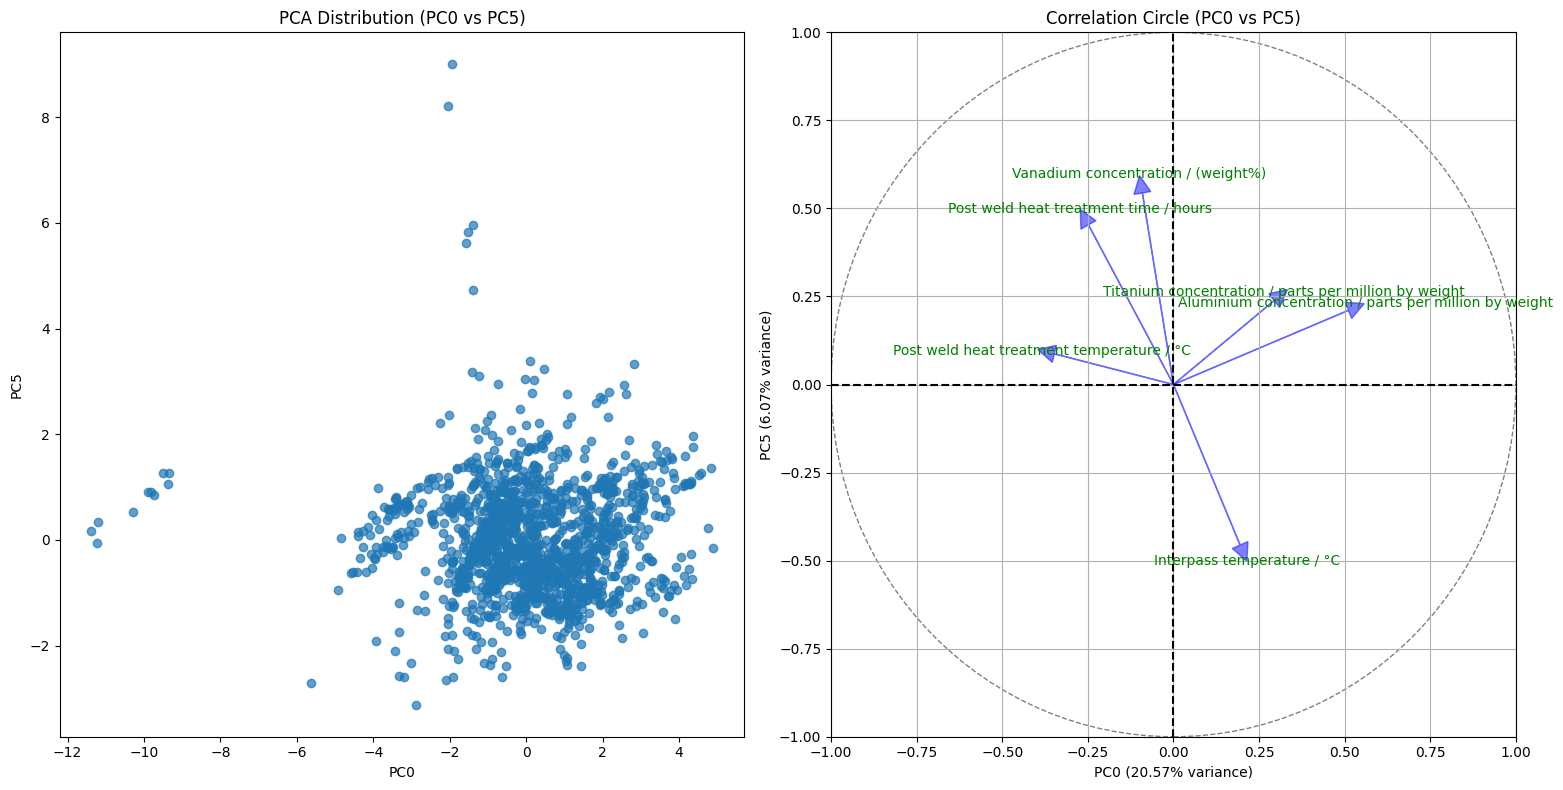

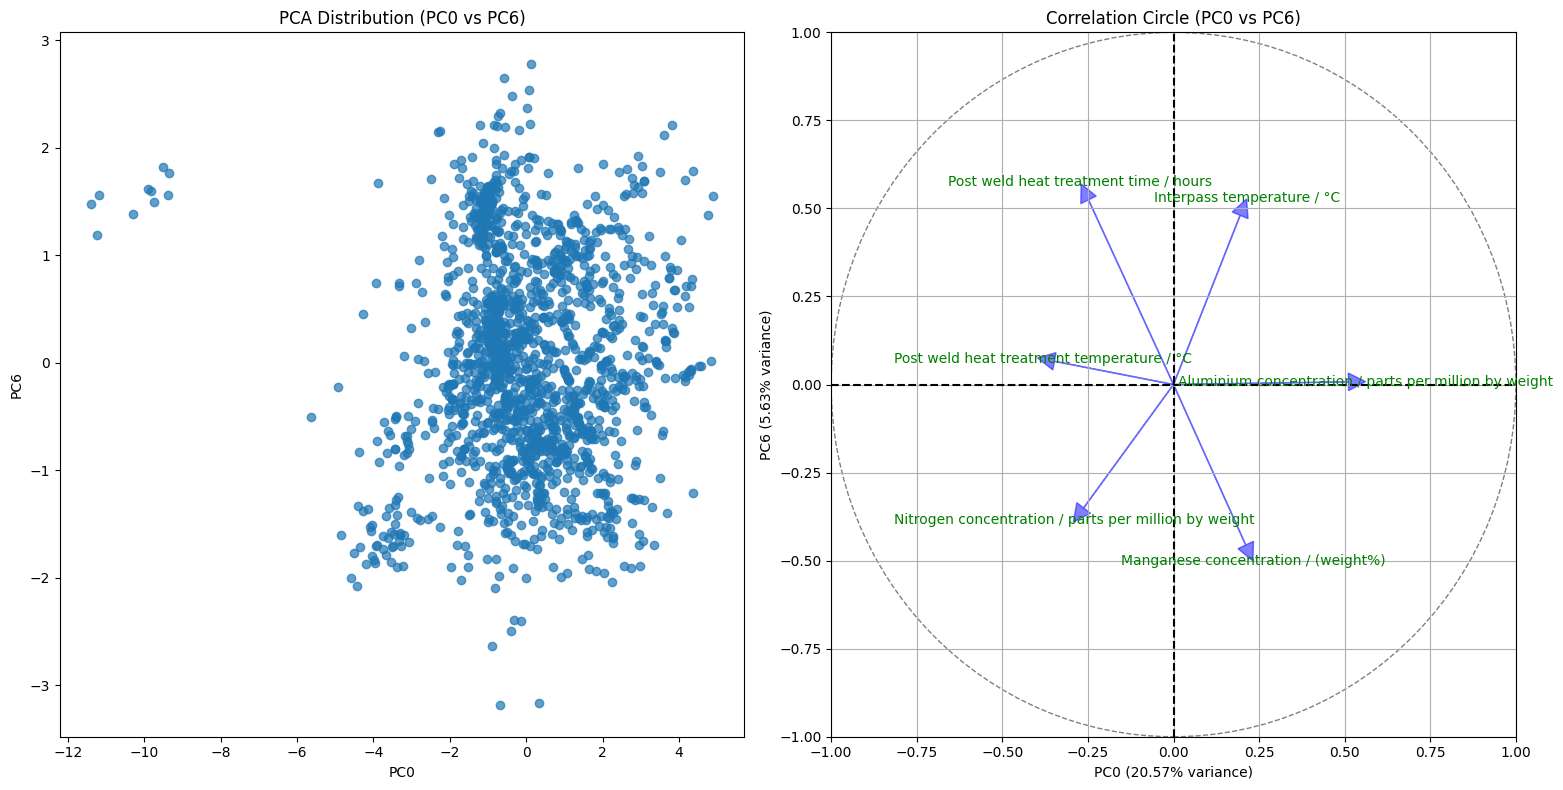

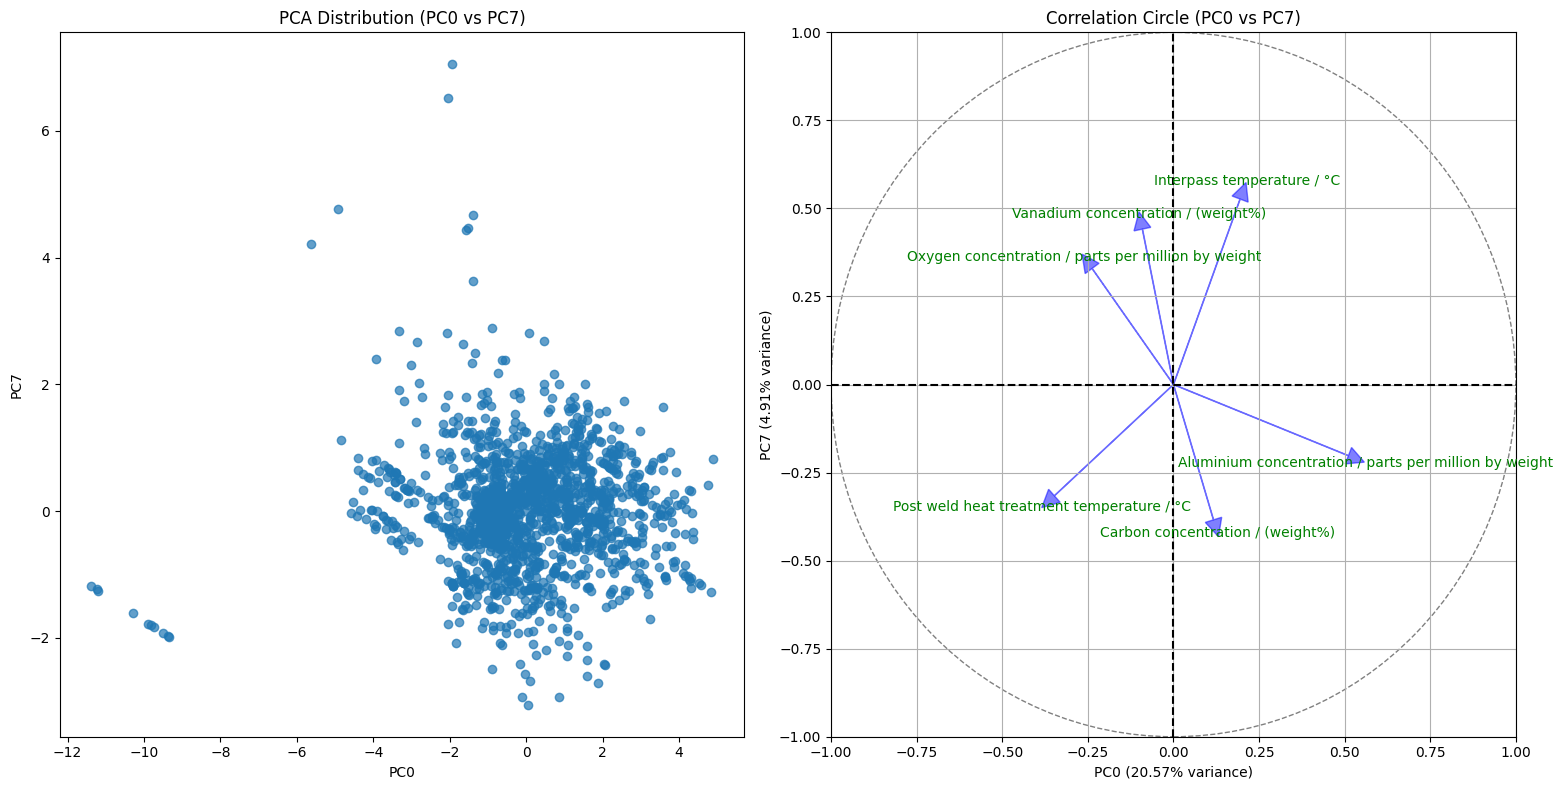

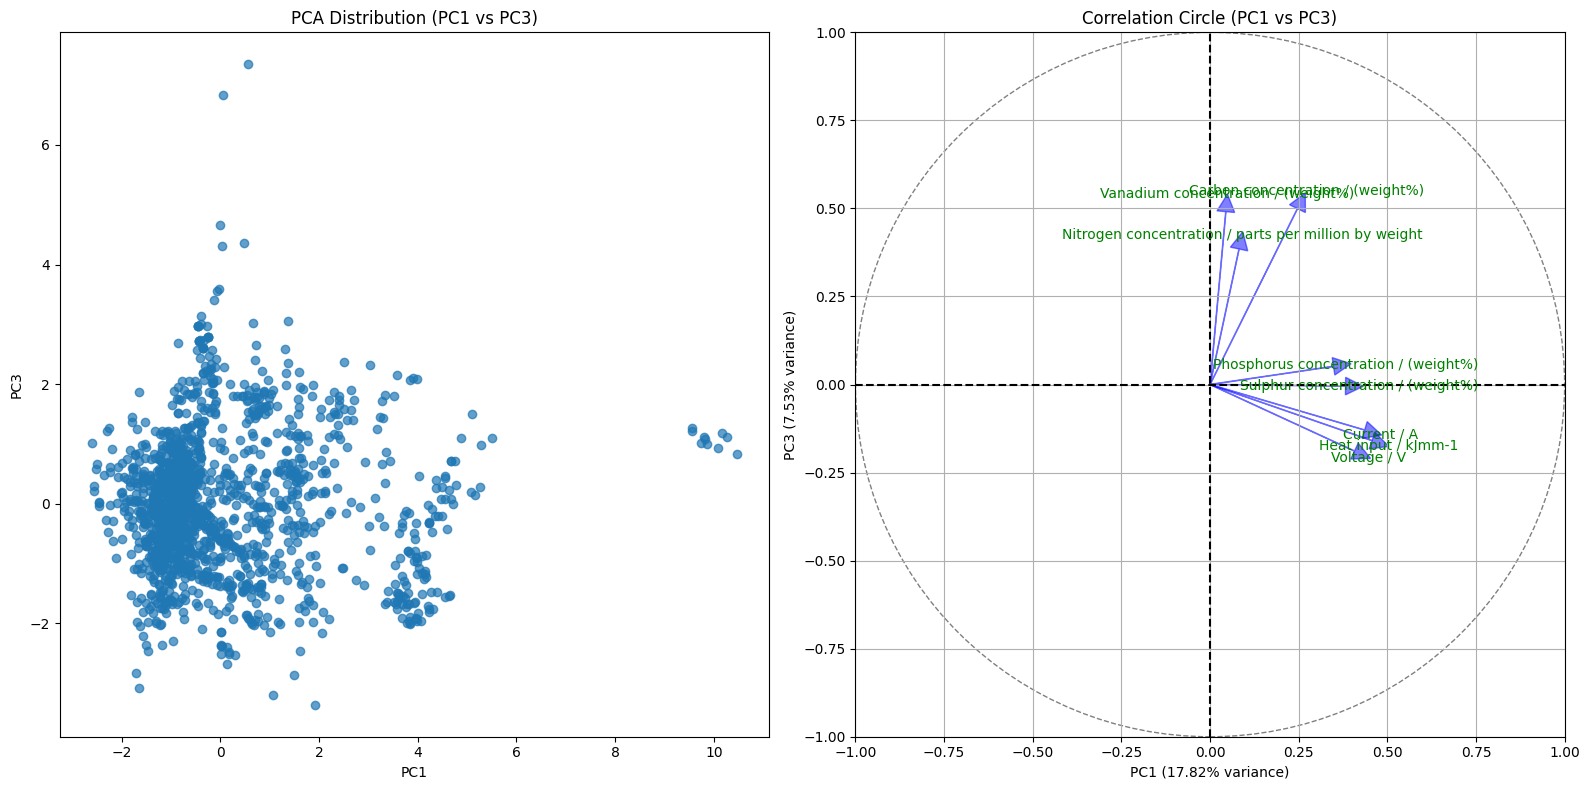

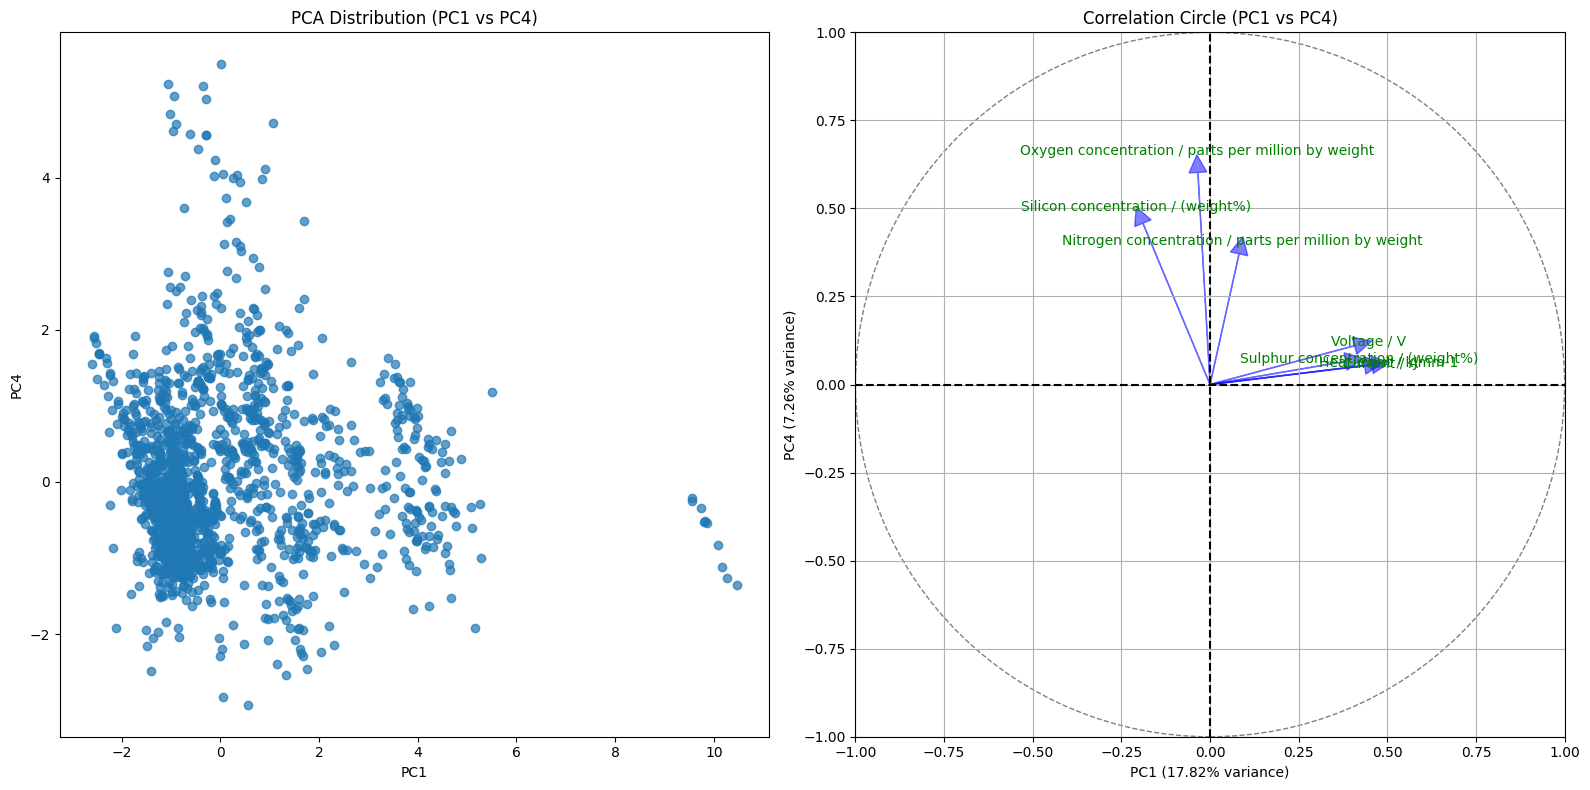

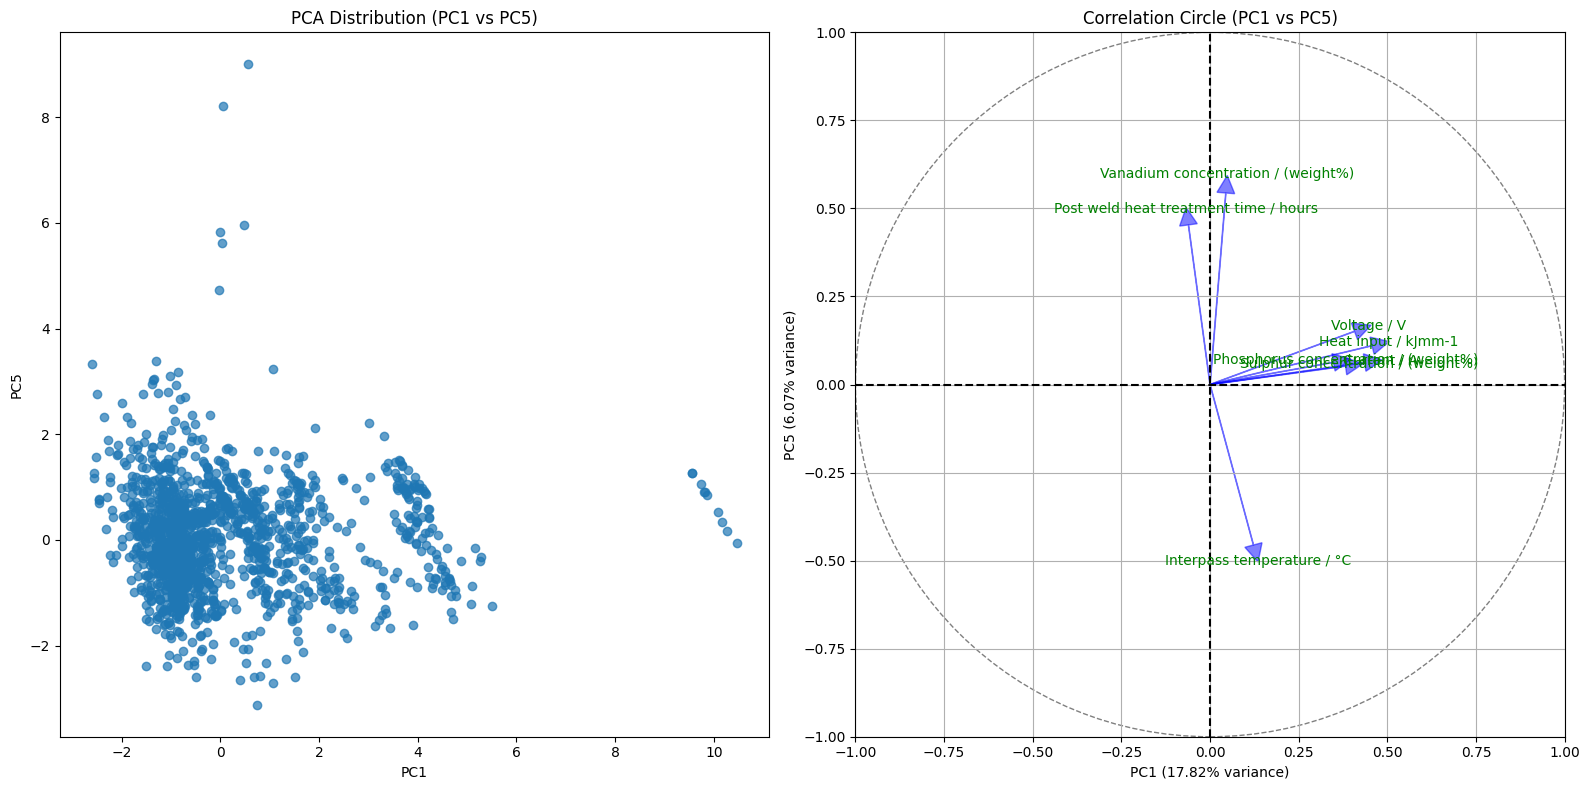

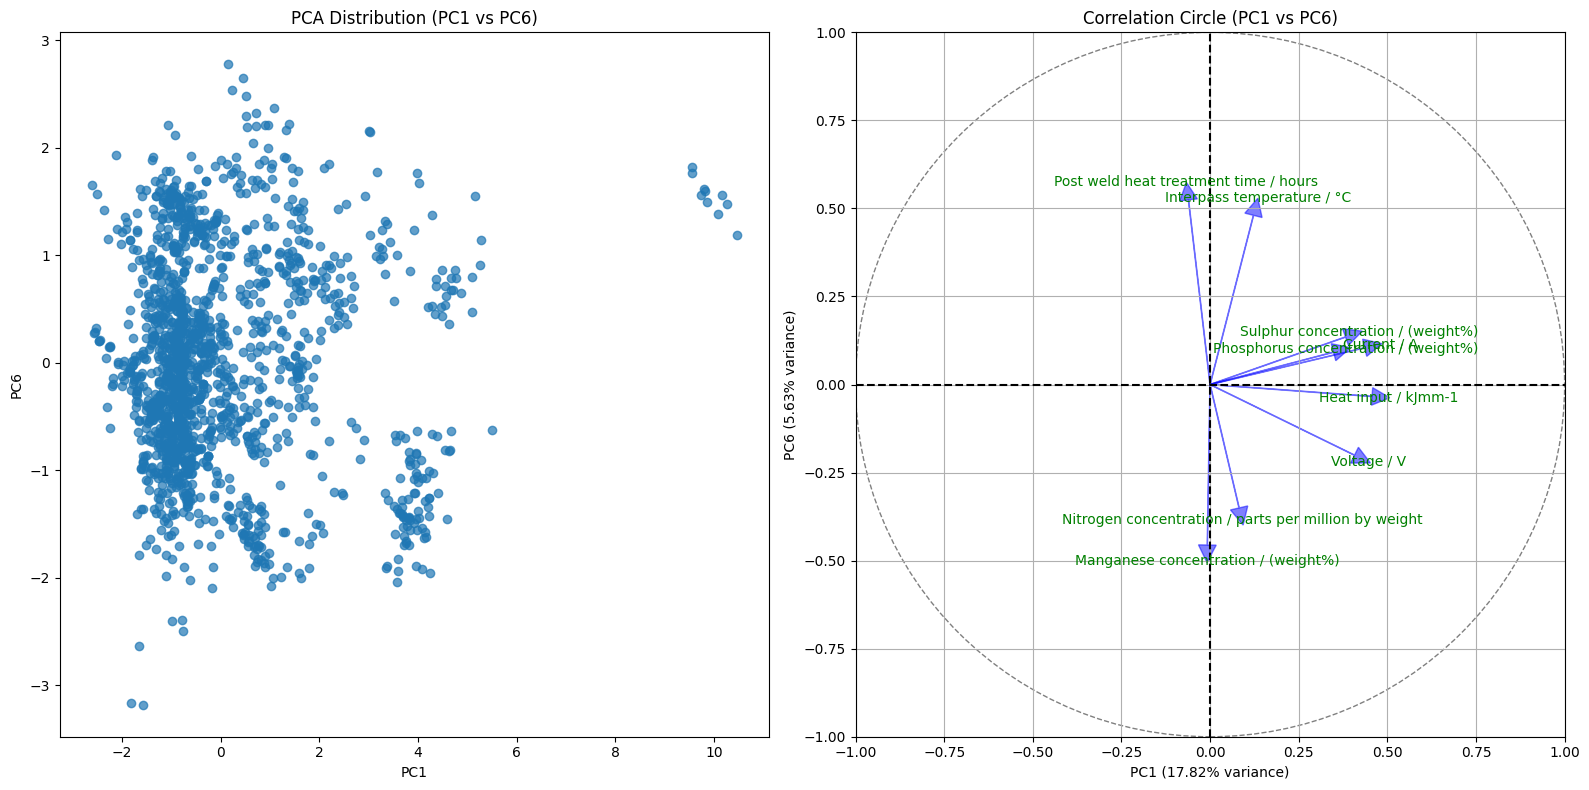

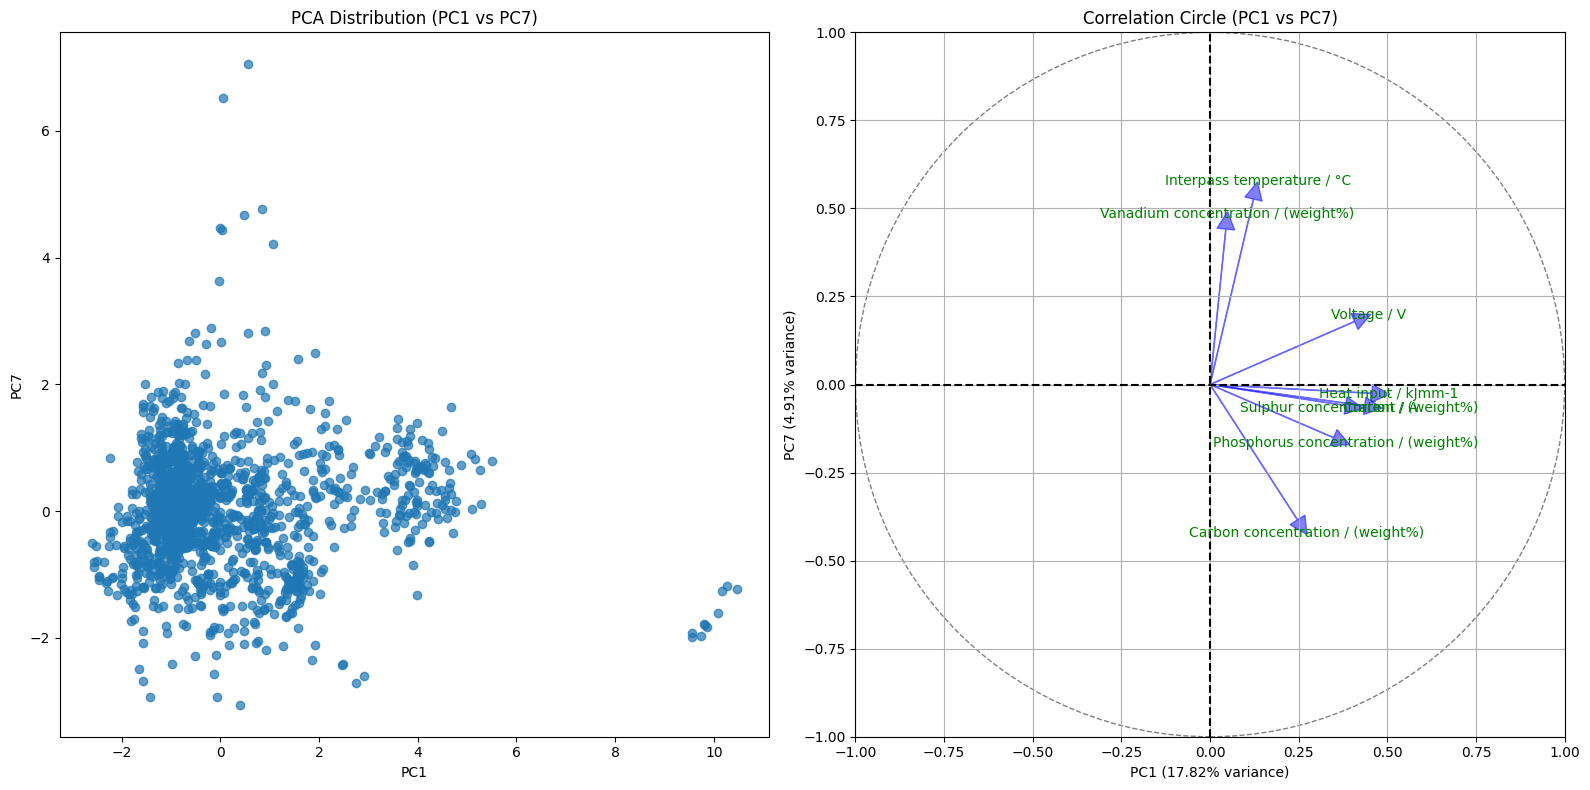

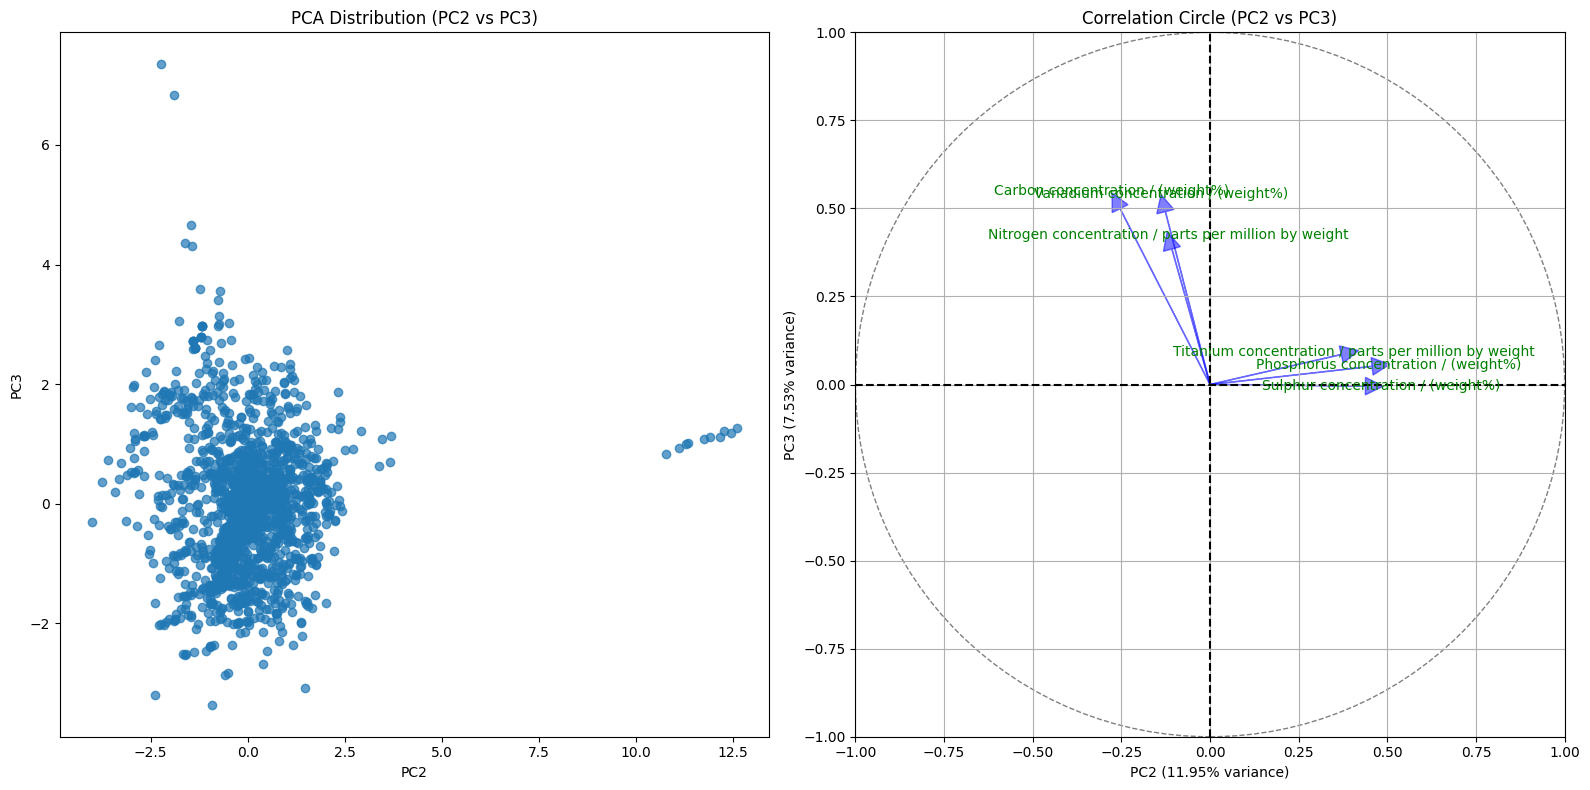

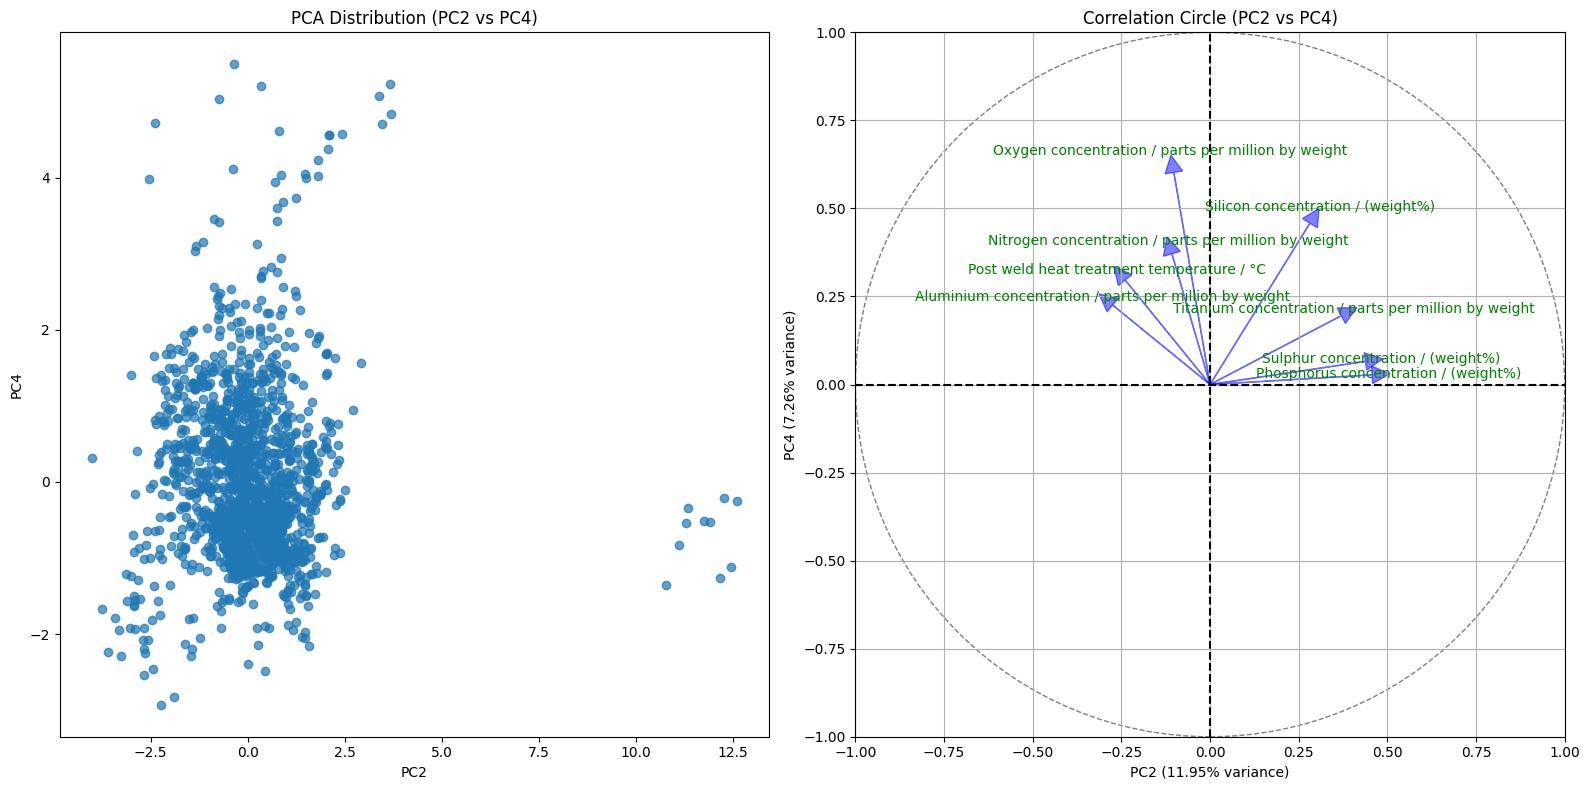

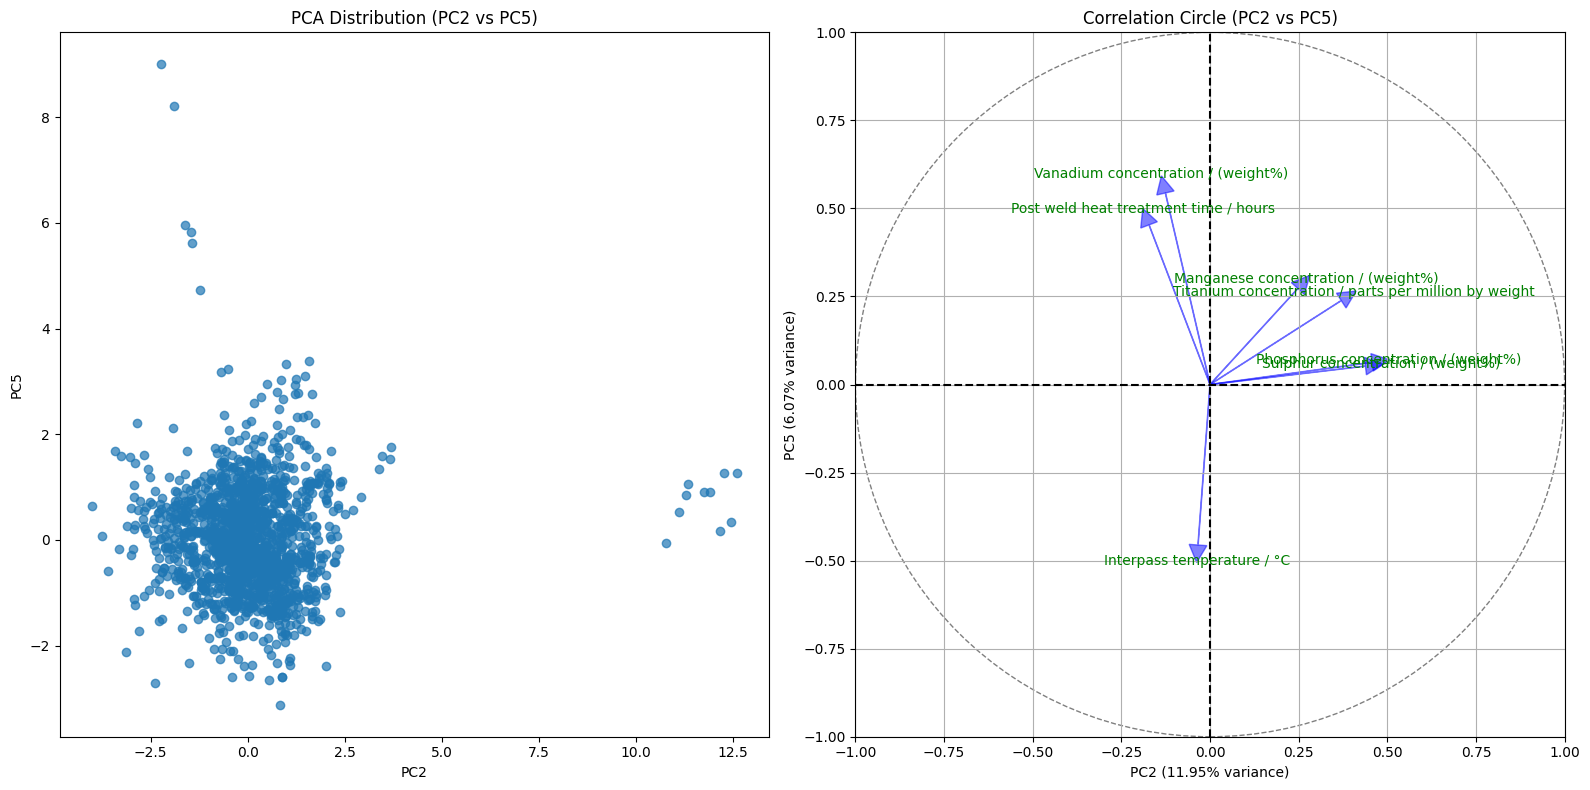

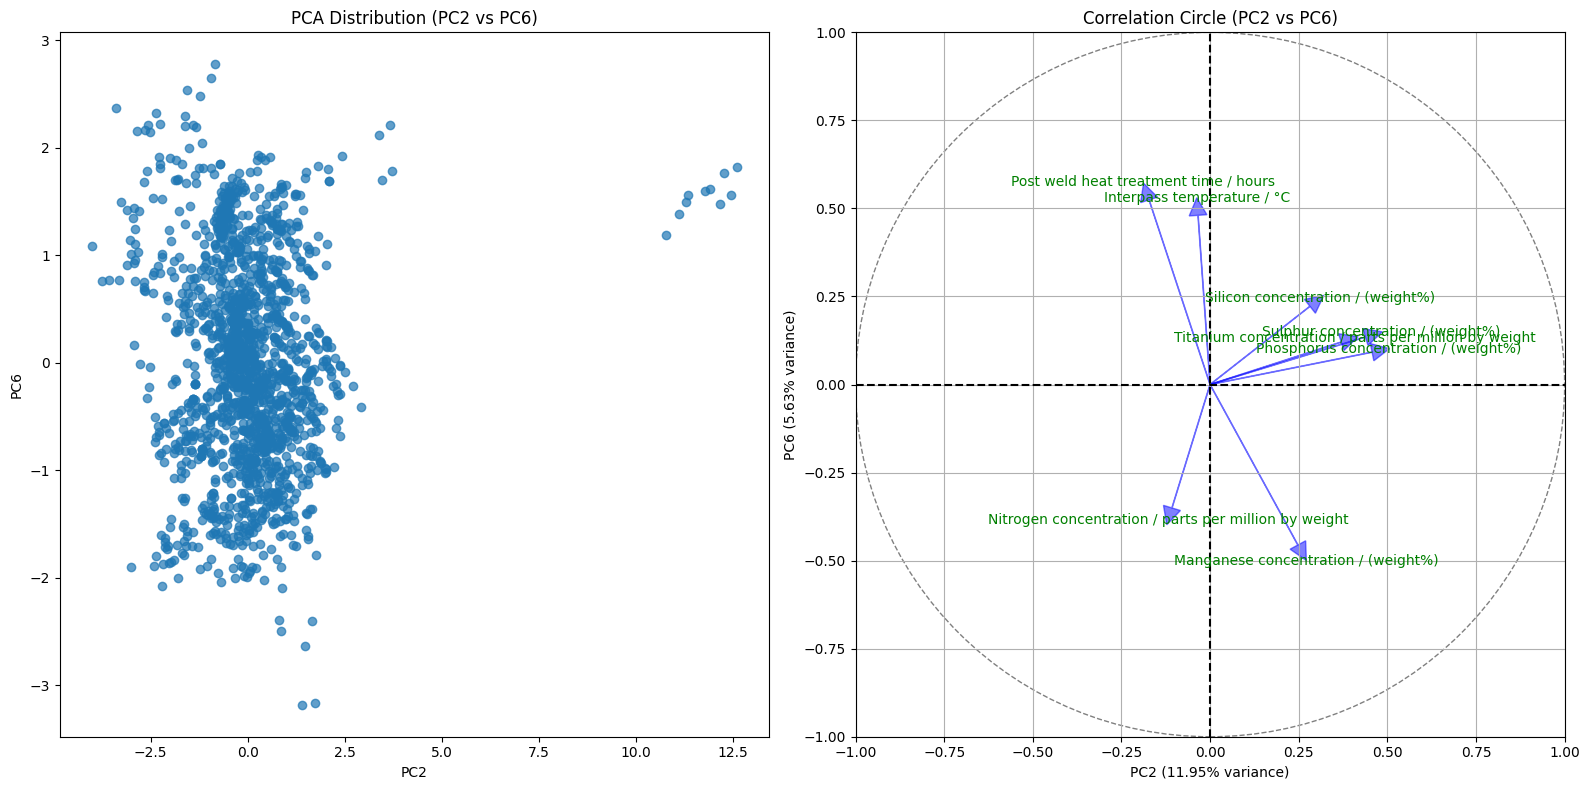

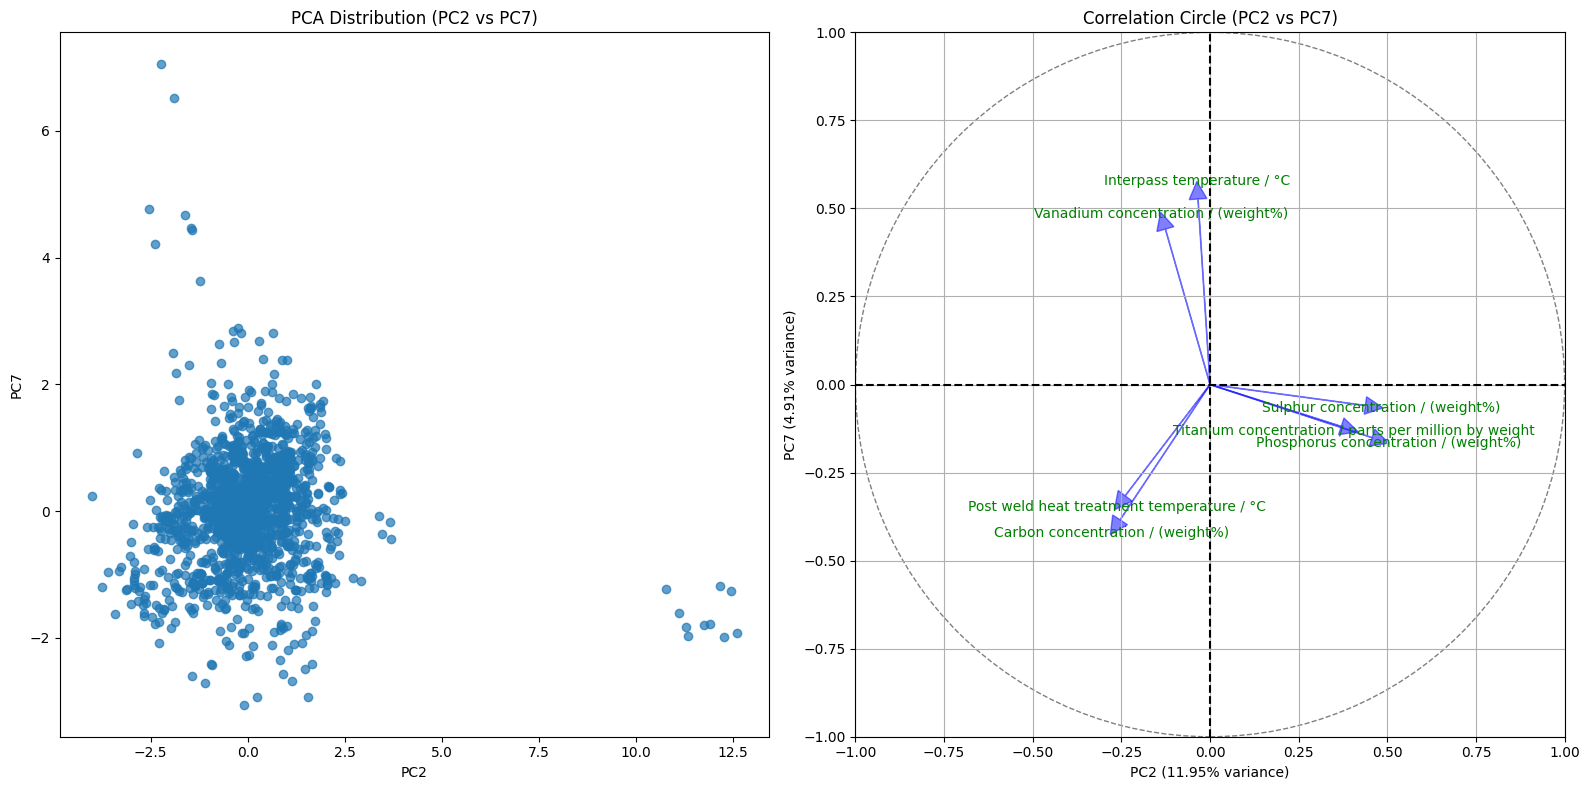

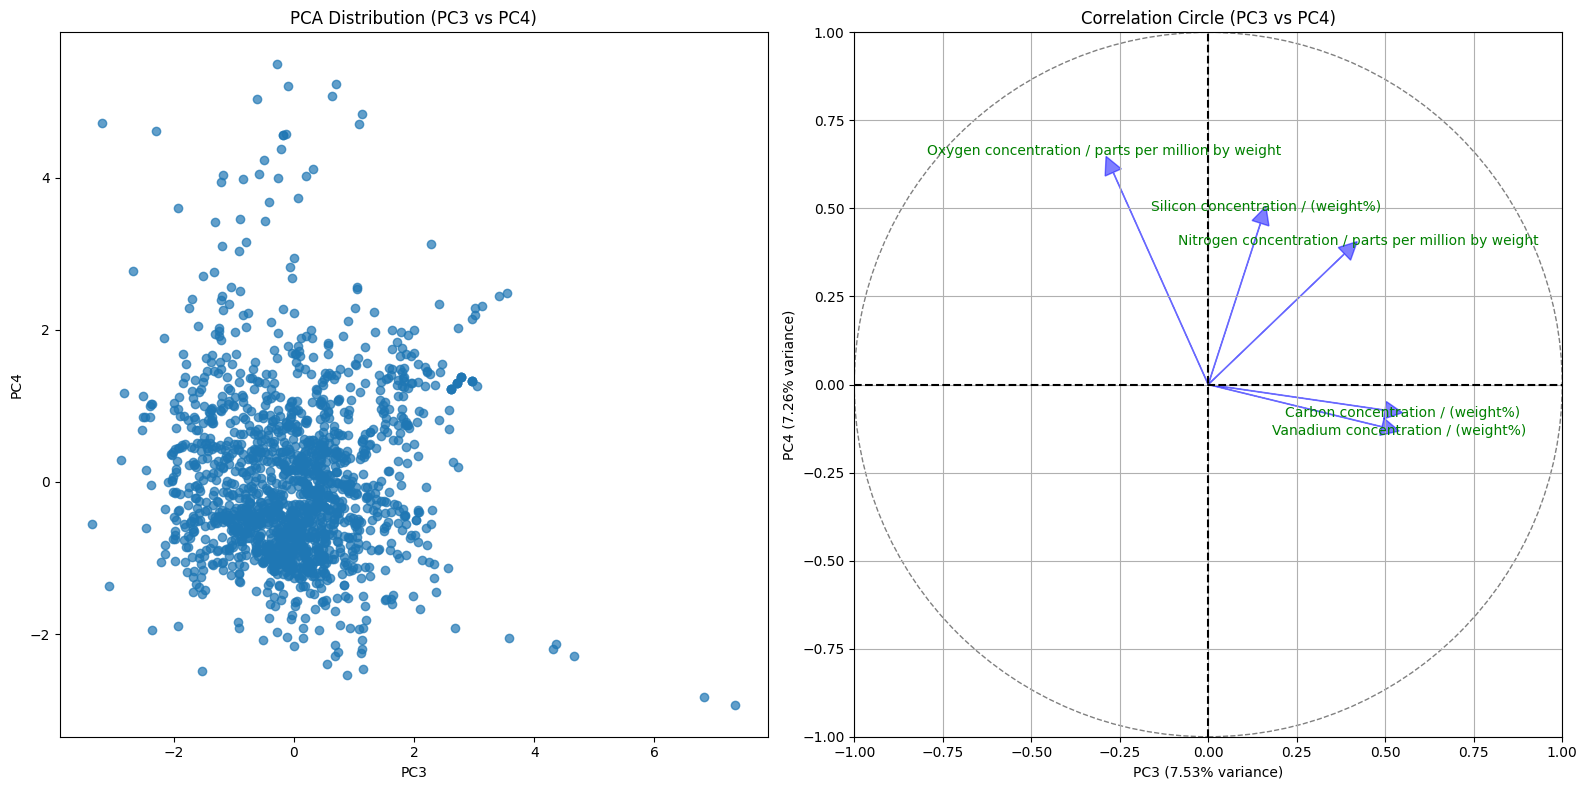

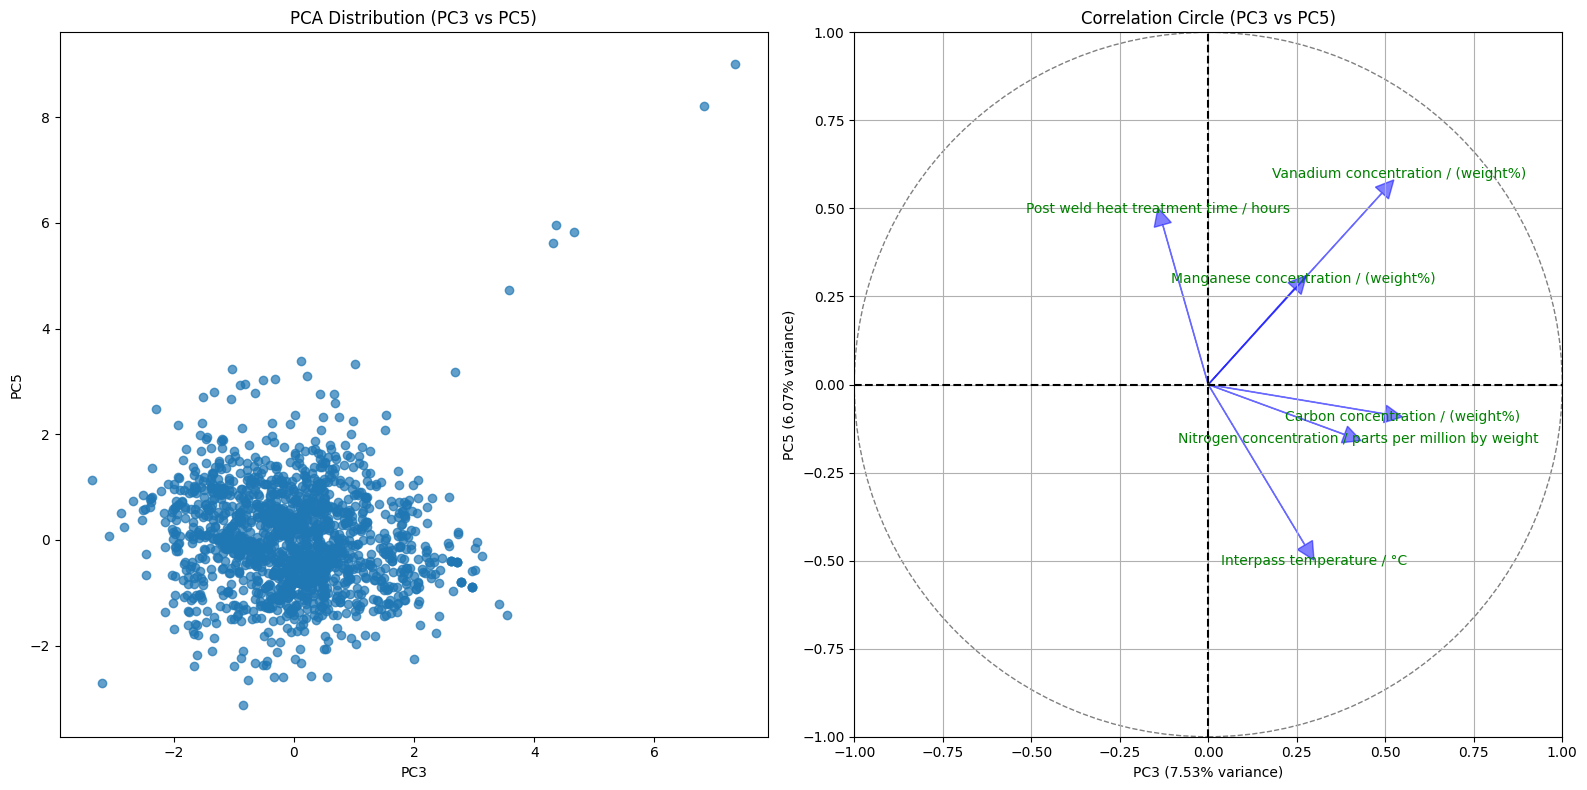

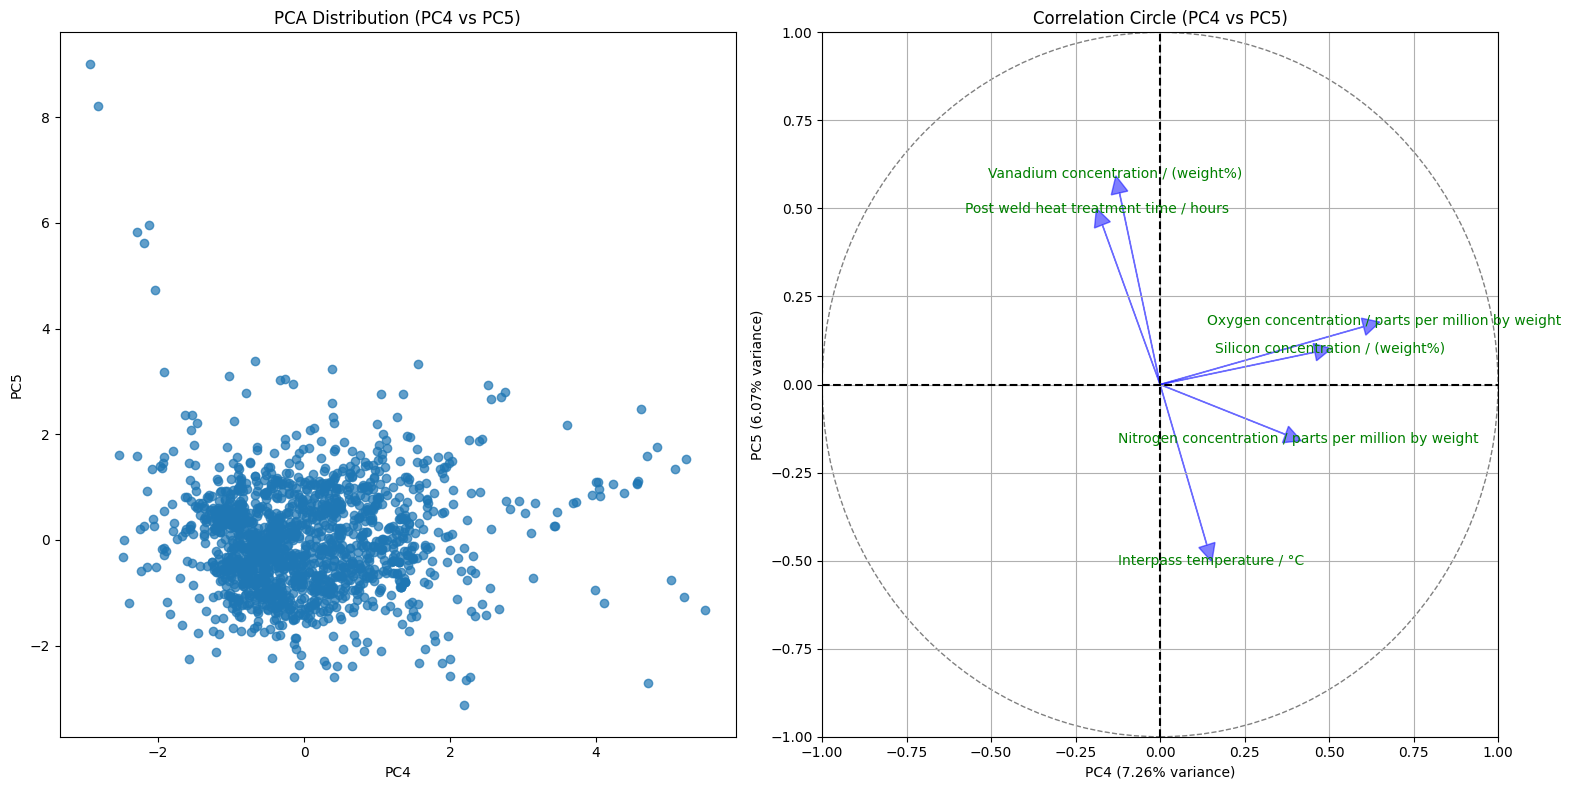

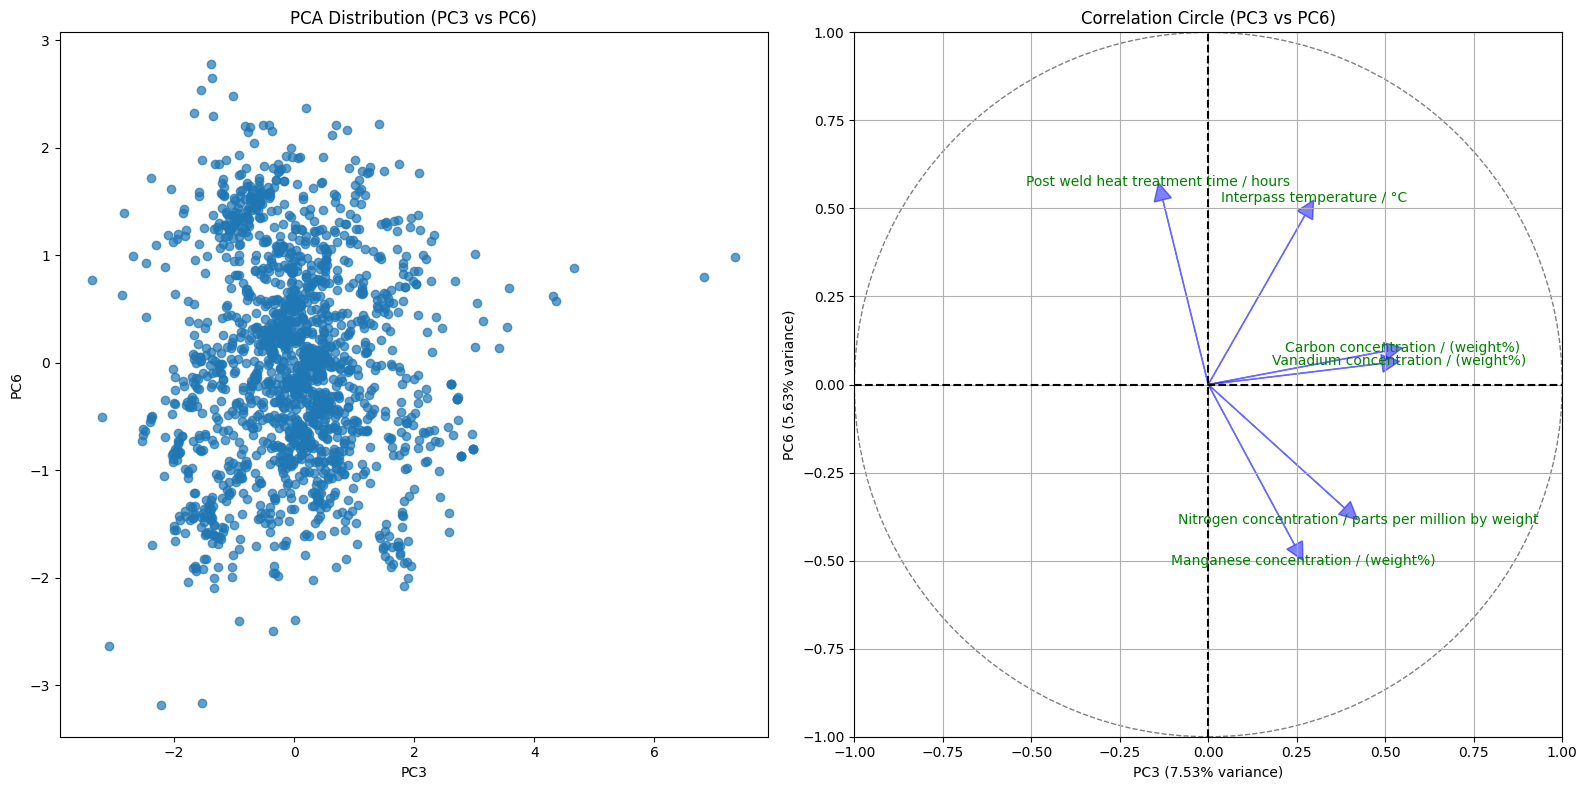

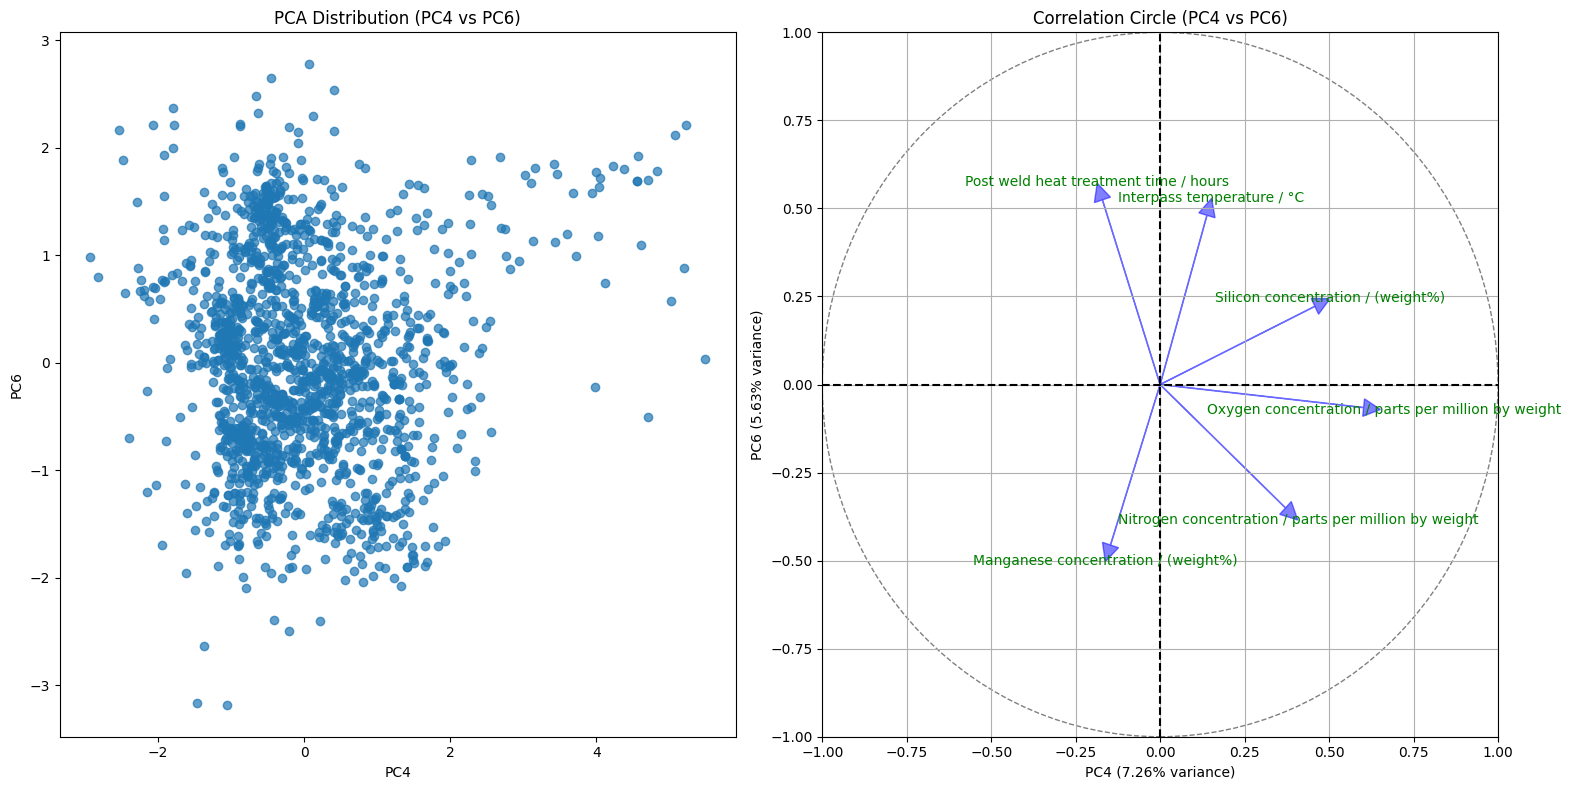

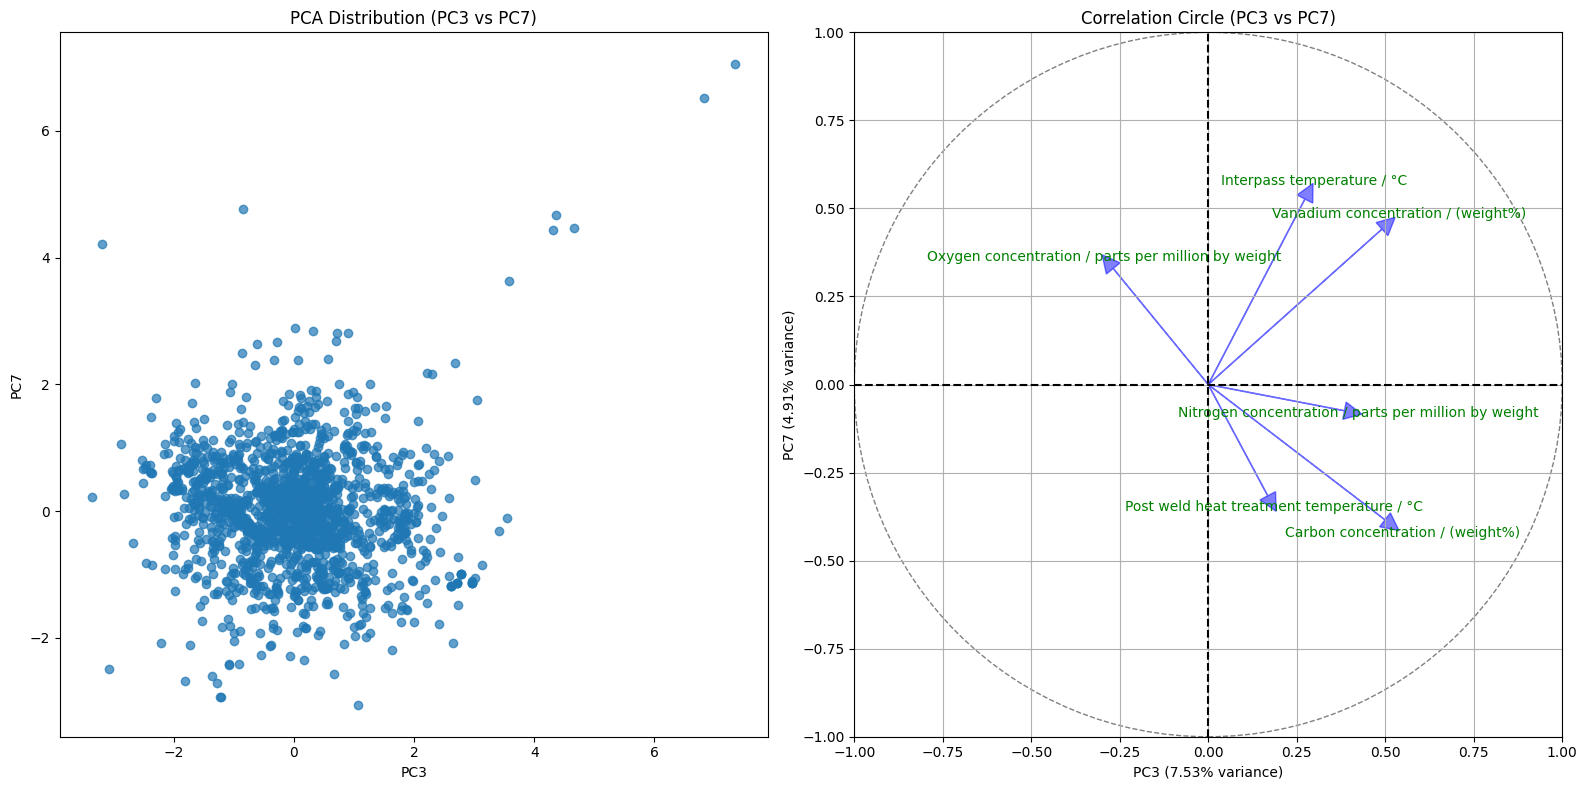

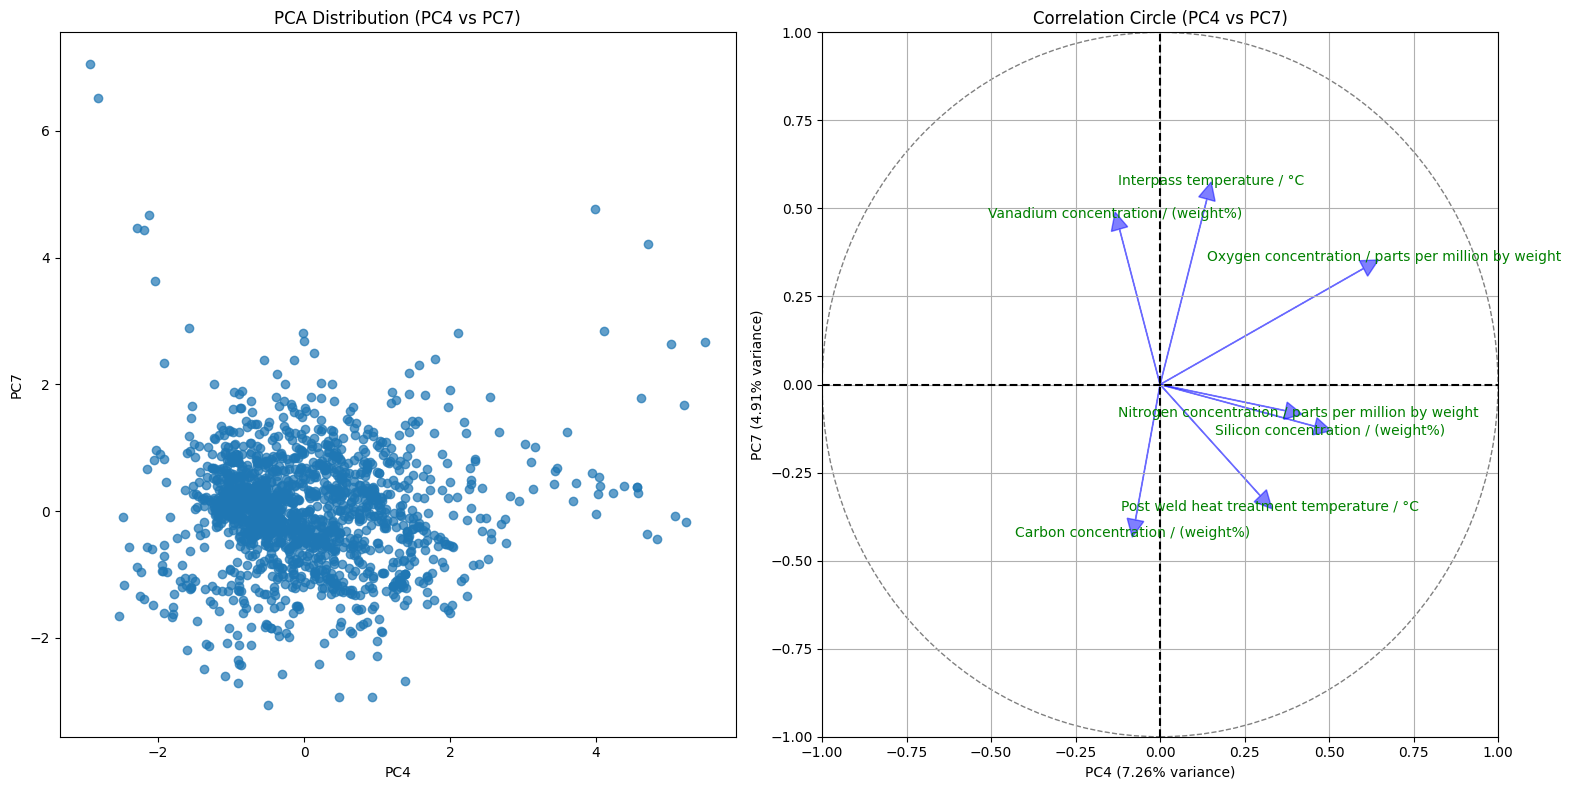

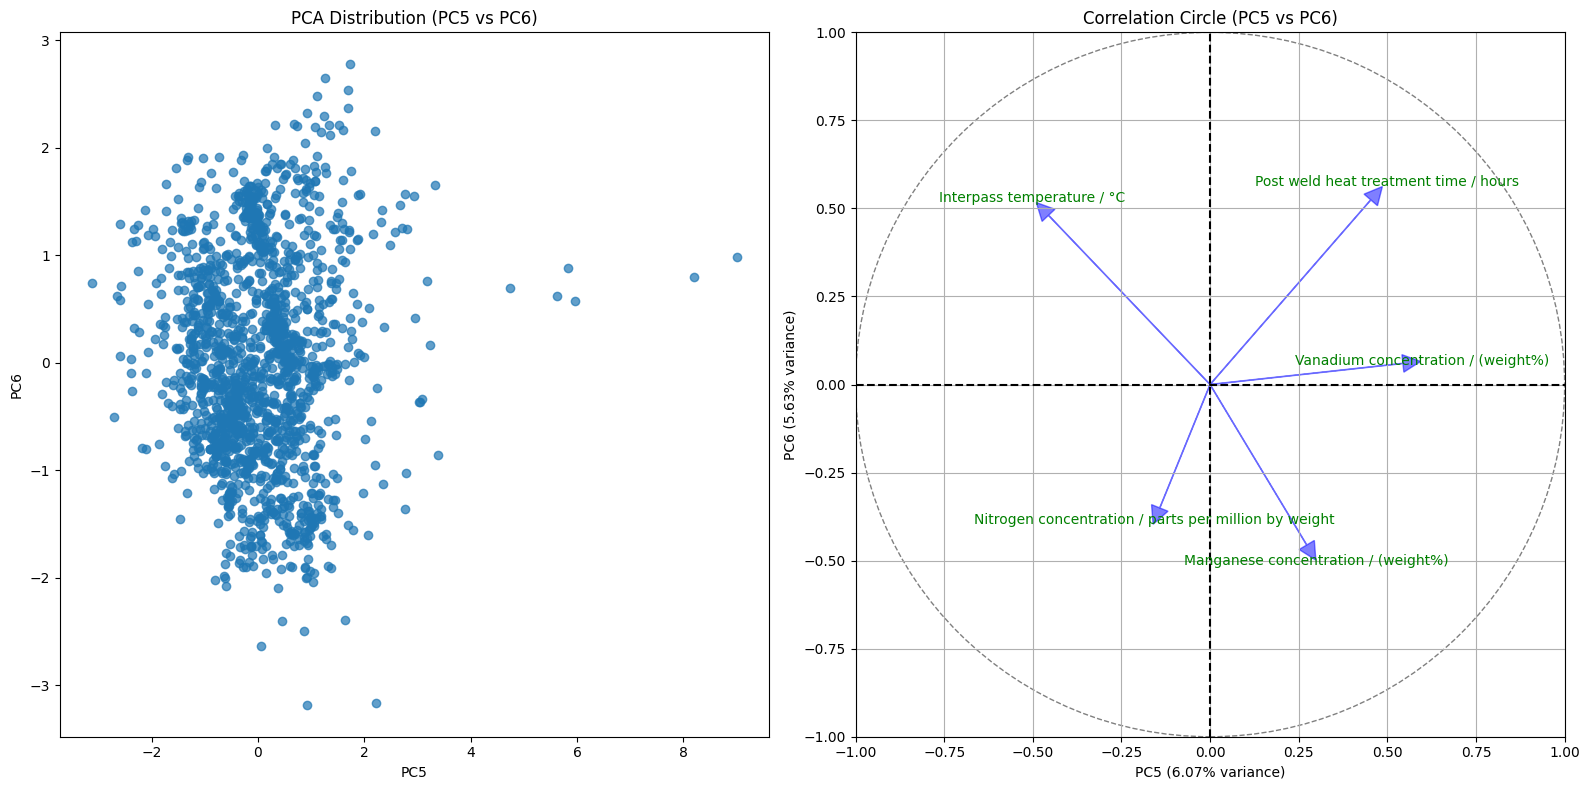

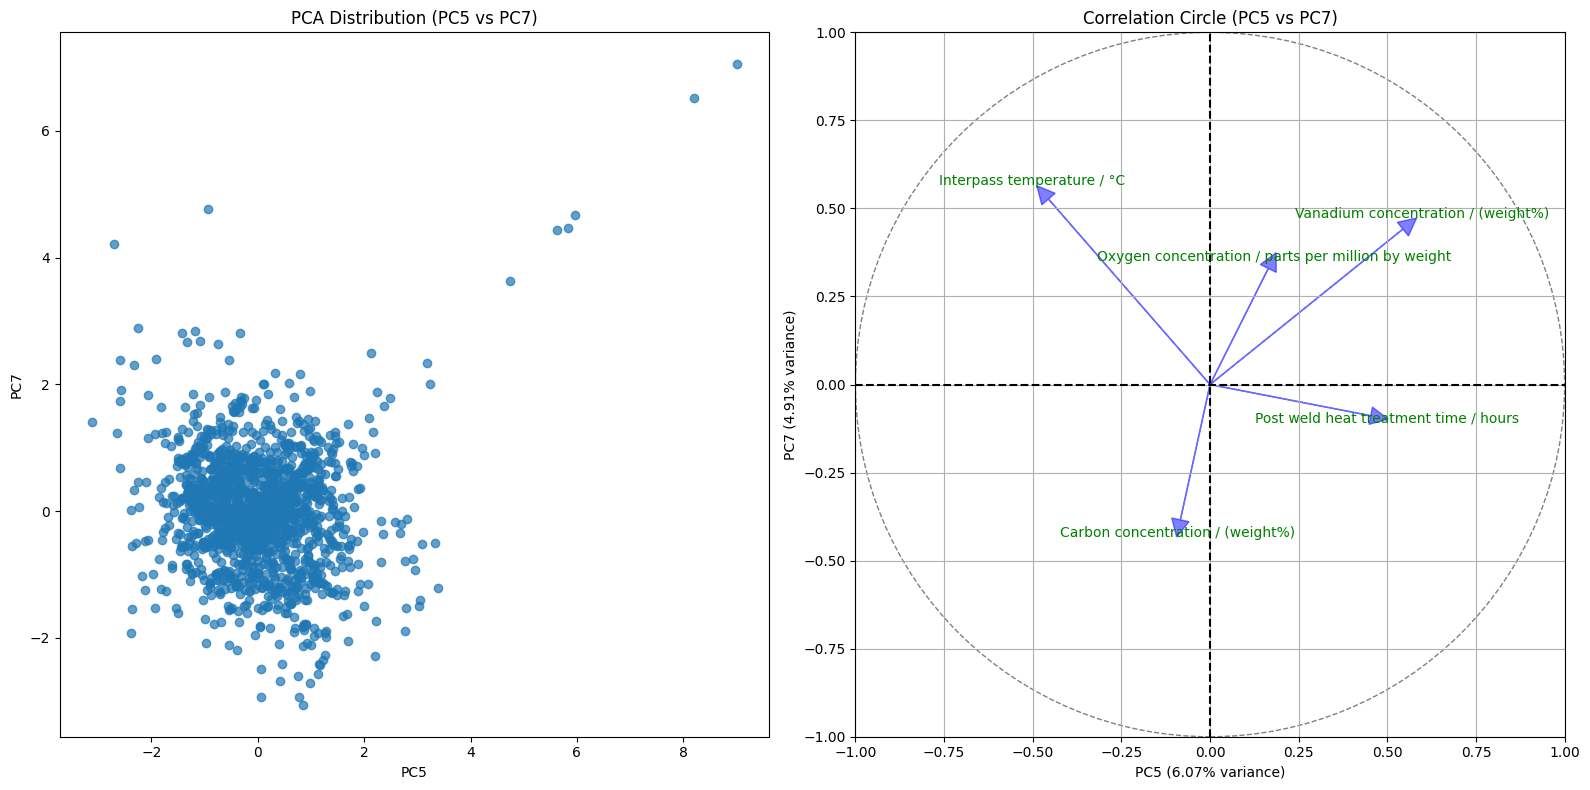

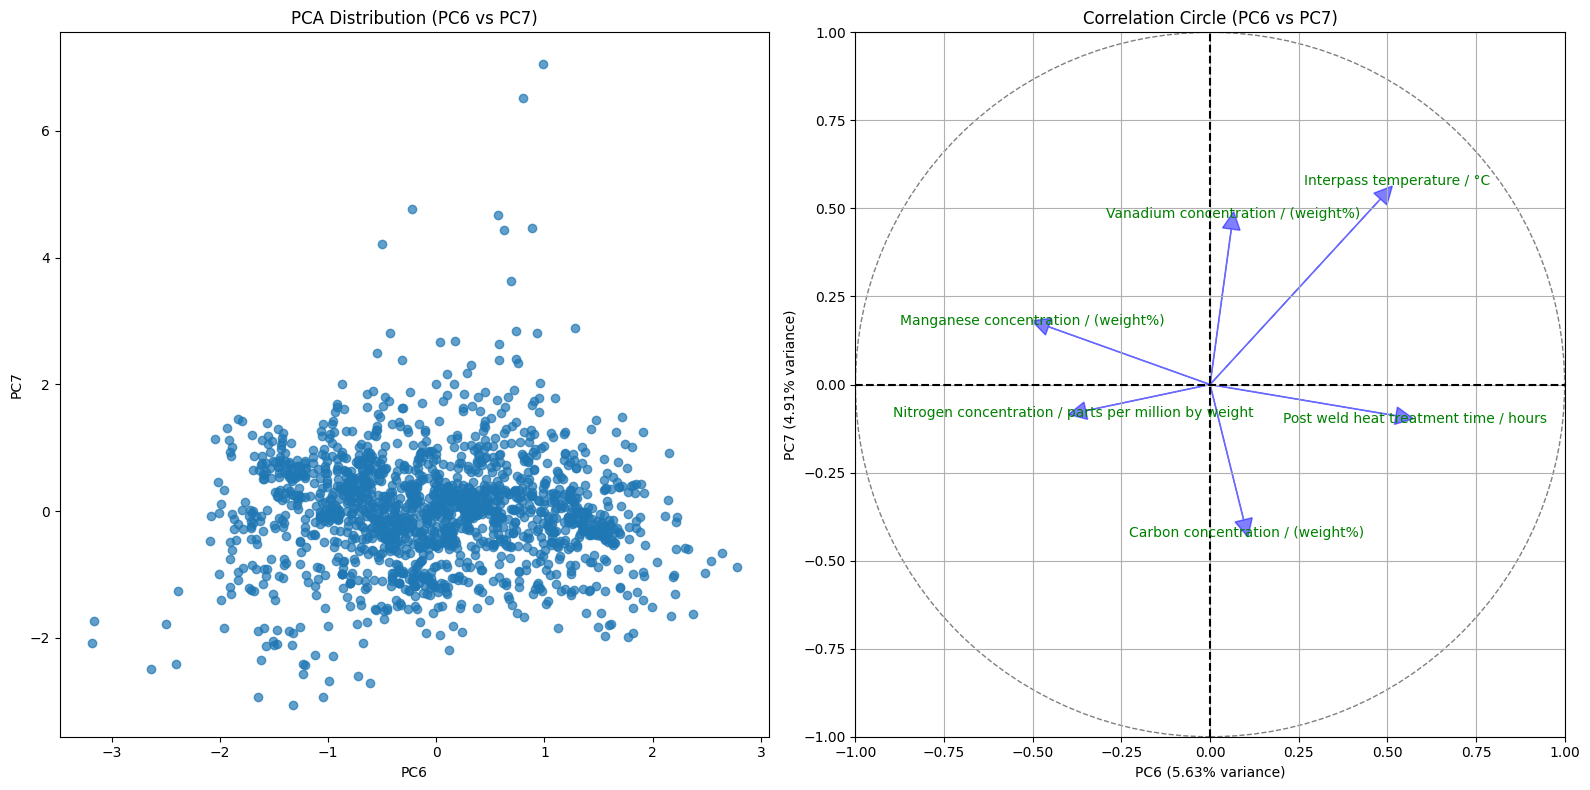

In [14]:
plot_PCA(pca, principal_components, nb_relevant_features, pca_datset.columns, threshold = 0.35)

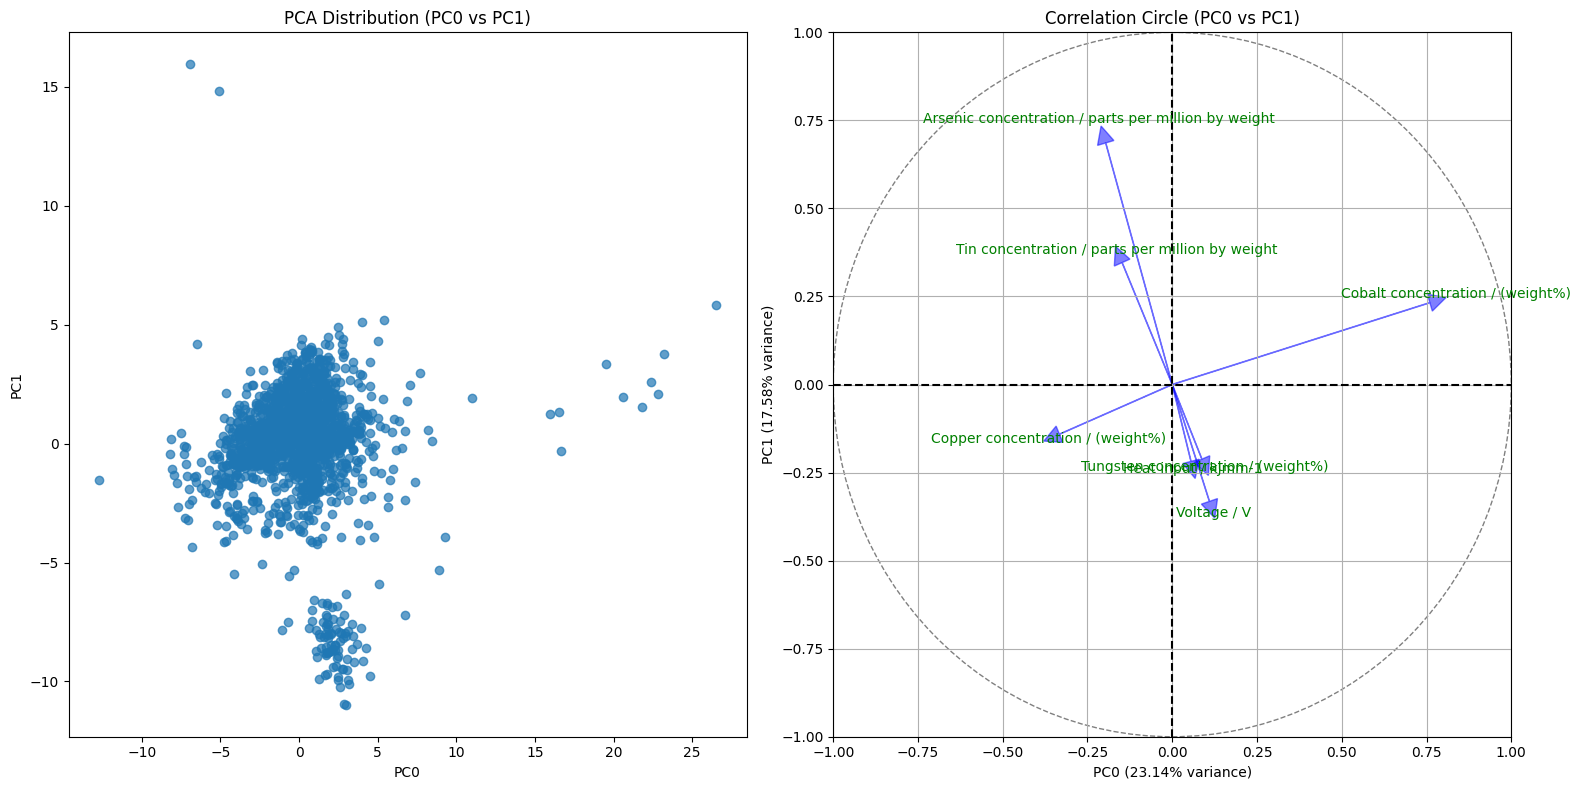

In [10]:
plot_PCA(pca, principal_components, 2, pca_datset.columns)

The features most correlated with the first principal componants are the ones most resembling a normal distribution and for which no value was imputed 

# Semi supervised learning

In [7]:
from models.semi_supervised import *
from models.evaluation import *

c:\Users\matte\Documents\Cours\3A\Mention\ApprAuto\Projet\apprAuto-projet\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
Db_complete = preprocess_semisupervised(Db, OutputColumn.yield_strength, Models.regressions)

In [10]:
from models.semi_supervised import *
from preprocess_semi import *
from models.evaluation import *

In [11]:
Db_complete = preprocess_semisupervised(Db, OutputColumn.yield_strength, Models.xgboost)